本文の流れ

- 状態空間モデルの導出
  - 車輪型倒立振子の状態方程式の導出
    + 運動エネルギーの導出
    + ポテンシャルエネルギーの導出
    + 散逸エネルギーの導出
    + Euler-Lagrangeの運動方程式の導出
  - 駆動系の動特性の導出
    + モータの動特性の導出
    + 駆動系の動特性の導出
  - システム全体の状態方程式の導出
  - 観測方程式の導出
  - 線形状態空間モデルの導出
- 制御器の設計
  - システムの可制御性・可観測性の確認
  - 状態フィードバックの設計
  - オブザーバの設計
    - 同一次元オブザーバの設計
    - 外乱オブザーバの設計
    - 外乱カルマンフィルタの設計
  - LQG 制御器の設計
- 実機のシステム同定
  - 倒立振子の幾何パラメータの同定
  - 駆動系の動特性の同定

# 状態空間モデルの導出

## 車輪型倒立振子の状態方程式の導出

Euler-Lagrange の運動方程式を用いて、車輪型倒立振子の状態方程式を導出する。

今回は、車輪型倒立振子の座標系・パラメータを以下の図のように設定する。
また、物理パラメータを以下のように表記する。

- $M_b$：車体の質量
- $M_w$：車輪の質量
- $I_b$：車体の重心周りの慣性モーメント
- $I_w$：車輪の重心周りの慣性モーメント
- $L$：車体の重心から車輪の重心までの距離
- $r$：車輪の半径
- $g$：重力加速度
- $D_{\phi}$：車軸の粘性抵抗

<img src="wheel_inverted_pendulum_overview.jpg">


### 運動エネルギーの導出

運動エネルギー$T$には、車体の運動エネルギー$T_b$と車輪の運動エネルギー$T_w$がある。

さらに、車体の運動エネルギーは車体の重心の並進運動エネルギー$T_{bv}$と車体の回転運動エネルギー$T_{br}$に分けられる。
同様に、車輪も車輪の重心の並進運動エネルギー$T_{wv}$と車輪の回転運動エネルギー$T_{wr}$に分けられる。

まず、並進運動エネルギーについて考える。

車体の重心の座標$(x_b,y_b)$は、

$$
\begin{aligned}
x_b &= r(\theta + \phi) + L \sin \theta \\
y_b &= r + L \cos \theta
\end{aligned}
$$

である。よって、車体の並進運動エネルギー$T_{bv}$は、

$$
\begin{aligned}
T_{bv} &= \frac{1}{2} M_b \left( \dot{x}_b^2 + \dot{y}_b^2 \right) \\
&= \frac{1}{2} M_b \left\{ \left( r \left[\dot{\theta}+ \dot{\phi}\right] + L \dot{\theta} \cos \theta \right)^2 + \left(- L \dot{\theta} \sin \theta \right)^2 \right\}  \\
&= \frac{1}{2} M_b \left\{ r^2 \left[\dot{\theta}+ \dot{\phi}\right]^2 + 2rL\left[\dot{\theta}+ \dot{\phi}\right]\dot{\theta} \cos \theta + L^2 \dot{\theta}^2 \right\}  \\
\end{aligned}
$$

となる。

また、車輪の重心の座標$(x_w,y_w)$は、

$$
\begin{aligned}
x_w &= r (\theta + \phi) \\
y_w &= r
\end{aligned}
$$

である。よって、車輪の並進運動エネルギー$T_{wv}$は、

$$
\begin{aligned}
T_{wv} &= \frac{1}{2} M_w \left( \dot{x}_w^2 + \dot{y}_w^2 \right) \\
&= \frac{1}{2} M_w \left\{ \left( r \left[\dot{\theta}+ \dot{\phi}\right] \right)^2 + 0 \right\}  \\
&=\frac{1}{2} M_w r^2 \left(\dot{\theta}+ \dot{\phi}\right)^2
\end{aligned}
$$

となる。

次に、回転運動エネルギーについて考える。
車体の回転運動エネルギー$T_{br}$は、

$$
T_{br}= \frac{1}{2} I_b \dot{\theta}^2
$$

となる。そして、車輪の回転運動エネルギー$T_{wr}$は、

$$
\begin{aligned}
T_{wr}&= \frac{1}{2} I_w \left(\dot{\phi} + \dot{\theta} \right)^2
\end{aligned}
$$

となる。

以上より、運動エネルギー$T$は、

$$
\begin{aligned}
T &= T_{bv} + T_{wv} + T_{br} + T_{wr} \\
&= \frac{1}{2}\left[I_w + r^2\left(M_b + M_w\right)\right]\left(\dot{\theta} + \dot{\phi}\right)^2 \\
&\quad + \frac{1}{2}\left[I_b + L^2M_b\right]\dot{\theta}^2 \\
&\quad +r L  M_b \dot{\theta} \left(\dot{\theta} + \dot{\phi}\right) \cos \theta
\end{aligned}
$$

となる。


### ポテンシャルエネルギーの導出

車体の位置エネルギー$U_b$、車輪の位置エネルギーは、それぞれ

$$
\begin{aligned}
U_b &= M_b g L \cos \theta \\
U_w &= 0
\end{aligned}
$$

である。よって、ポテンシャルエネルギー$U$は、

$$
\begin{aligned}
U &= U_b + U_w \\
&= M_b g L \cos \theta
\end{aligned}
$$

である。


### 散逸エネルギーの導出

車軸間の摩擦によってエネルギー損失が生じると仮定する。このとき、散逸エネルギー$F$は、

$$
F = \frac{1}{2} D_{\phi} \dot{\phi}^2
$$

となる。


### Euler-Lagrange の運動方程式の導出

ラグランジアン$L$は、

$$
\begin{aligned}
L &= T - U\\
&= \frac{1}{2}\left[I_w + r^2\left(M_b + M_w\right)\right]\left(\dot{\theta} + \dot{\phi}\right)^2 \\
&\quad + \frac{1}{2}\left[I_b + L^2M_b\right]\dot{\theta}^2 \\
&\quad +r L  M_b \dot{\theta} \left(\dot{\theta} + \dot{\phi}\right) \cos \theta- g L M_b  \cos \theta
\end{aligned}
$$

となる。一般化座標$q$、一般化力$\tau$に対する Euler-Lagrange の運動方程式は、

$$
\frac{d}{dt} \left( \frac{\partial L}{\partial \dot{q}} \right) - \frac{\partial L}{\partial q} + \frac{\partial F}{\partial \dot{q}} = \tau
$$

である。$\theta, \phi$に対する Euler-Lagrange の運動方程式は、

$$
\begin{aligned}
\frac{d}{dt} \left( \frac{\partial L}{\partial \dot{\theta}} \right) - \frac{\partial L}{\partial \theta} + \frac{\partial F}{\partial \dot{\theta}} &= \tau_\theta\\
\frac{d}{dt} \left( \frac{\partial L}{\partial \dot{\phi}} \right) - \frac{\partial L}{\partial \phi} + \frac{\partial F}{\partial \dot{\phi}} &= \tau_\phi
\end{aligned}
$$

である。ここで、$\tau_\theta, \tau_\phi$はそれぞれ、$\theta,\phi$座標系に加わる一般化力である。
まず$\theta$の運動方程式を計算する。

$$
\begin{aligned}
\frac{\partial L}{\partial \dot{\theta}} &= \left[I_w + r^2\left(M_b + M_w\right)\right]\left(\dot{\theta} + \dot{\phi}\right) + \left[I_b + L^2M_b\right]\dot{\theta} +r L  M_b  \left(2\dot{\theta} + \dot{\phi}\right) \cos \theta\\
&= \left[I_w + I_b + L^2M_b +r^2\left(M_b + M_w\right)\right]\dot{\theta} + \left[I_w + r^2\left(M_b + M_w\right)\right]\dot{\phi} +r L  M_b  \left(2\dot{\theta} + \dot{\phi}\right) \cos \theta \\
\frac{d}{dt}\frac{\partial L}{\partial \dot{\theta}} &= \frac{d}{dt}\left\{\left[I_w + I_b + L^2M_b +r^2\left(M_b + M_w\right)\right]\dot{\theta} + \left[I_w + r^2\left(M_b + M_w\right)\right]\dot{\phi} +r L  M_b  \left(2\dot{\theta} + \dot{\phi}\right) \cos \theta\right\} \\
&=\left[I_w + I_b + L^2M_b +r^2\left(M_b + M_w\right)\right]\ddot{\theta} + \left[I_w + r^2\left(M_b + M_w\right)\right]\ddot{\phi} + r L  M_b  \left(2\ddot{\theta} + \ddot{\phi}\right) \cos \theta - r L  M_b  \left(2\dot{\theta} + \dot{\phi}\right) \dot{\theta}\sin \theta\\
\frac{\partial L}{\partial \theta} &= -rL M_b \dot{\theta}^2 \sin \theta  - rLM_b \dot{\phi}\dot{\theta}  \sin \theta + g L M_b  \sin \theta \\
\frac{\partial F}{\partial \dot{\theta}} &= 0 \\
\end{aligned}
$$

である。よって、$\theta$の運動方程式は、

$$
\begin{aligned}
&\left[I_w + I_b + L^2M_b +r^2\left(M_b + M_w\right)\right]\ddot{\theta} + \left[I_w + r^2\left(M_b + M_w\right)\right]\ddot{\phi} + r L  M_b  \left(2\ddot{\theta} + \ddot{\phi}\right) \cos \theta - r L  M_b  \left(\bcancel{2}\dot{\theta} + \cancel{\dot{\phi}}\right) \dot{\theta}\sin \theta \\
&\quad +  \bcancel{rLM_b \dot{\theta}^2 \sin \theta} + \cancel{rLM_b  \dot{\phi}\dot{\theta}\sin \theta } -g L M_b  \sin \theta = \tau_\theta\\
\therefore &\left[I_b + L^2M_b +I_w + r^2\left(M_b + M_w\right) + 2r LM_b \cos \theta \right]\ddot{\theta} \\
&\quad+ \left[I_w + r^2\left(M_b + M_w\right) + rL M_b\cos \theta \right]\ddot{\phi} - r L  M_b  \dot{\theta}^2 \sin \theta - g L M_b  \sin \theta = \tau_\theta \\
\end{aligned}
$$

となる。次に$\phi$の運動方程式を計算する。

$$
\begin{aligned}
\frac{\partial L}{\partial \dot{\phi}} &= \left[I_w + r^2\left(M_b + M_w\right)\right]\left(\dot{\theta} + \dot{\phi}\right) +r L  M_b  \dot{\theta} \cos \theta\\
&= \left[I_w + r^2\left(M_b + M_w\right)\right]\dot{\theta} + \left[I_w + r^2\left(M_b + M_w\right)\right]\dot{\phi} +r L  M_b  \dot{\theta} \cos \theta\\
\frac{d}{dt}\frac{\partial L}{\partial \dot{\phi}} &= \frac{d}{dt}\left\{\left[I_w + r^2\left(M_b + M_w\right)\right]\dot{\theta} + \left[I_w + r^2\left(M_b + M_w\right)\right]\dot{\phi} +r L  M_b  \dot{\theta} \cos \theta\right\} \\
&=\left[I_w + r^2\left(M_b + M_w\right)\right]\ddot{\theta} + \left[I_w + r^2\left(M_b + M_w\right)\right]\ddot{\phi} + rLM_b \ddot{\theta} \cos \theta - r L  M_b  \dot{\theta}^2 \sin \theta\\
\frac{\partial L}{\partial \phi} &= 0 \\
\frac{\partial F}{\partial \dot{\phi}} &= D_{\phi} \dot{\phi} \\
\end{aligned}
$$

である。よって、$\phi$の運動方程式は、

$$
\begin{aligned}
&\left[I_w + r^2\left(M_b + M_w\right)\right]\ddot{\theta} + \left[I_w + r^2\left(M_b + M_w\right)\right]\ddot{\phi} + rLM_b \ddot{\theta} \cos \theta - r L  M_b  \dot{\theta}^2 \sin \theta  + D_{\phi} \dot{\phi} = \tau_\phi \\
\therefore &\left[I_w + r^2\left(M_b + M_w\right) + rL M_b \cos \theta \right]\ddot{\theta} + \left[I_w + r^2\left(M_b + M_w\right) \right]\ddot{\phi} + D_{\phi} \dot{\phi} - r L  M_b  \dot{\theta}^2 \sin \theta = \tau_\phi \\
\end{aligned}
$$

となる。ここで、方程式の定数をまとめるため、

$$
\begin{aligned}
a &= I_w + r^2\left(M_b + M_w\right) \\
b &= I_b + L^2M_b \\
c &= r L M_b \\
d &= gL M_b \\
\end{aligned}
$$

とおくと、$\theta,\phi$の運動方程式はそれぞれ、

$$
\begin{aligned}
\left(a + b + 2c\cos \theta \right)\ddot{\theta} + \left(a + c\cos \theta \right)\ddot{\phi} - c \dot{\theta}^2 \sin \theta - d \sin \theta &= \tau_\theta \\
\left(a + c\cos \theta \right)\ddot{\theta} + a\ddot{\phi} + D_{\phi} \dot{\phi} - c \dot{\theta}^2 \sin \theta &= \tau_\phi \\
\end{aligned}
$$

となる。この連立の運動方程式をシミュレーションに適するように、$\bm{x}=\begin{bmatrix}\theta & \phi & \dot{\theta} & \dot{\phi}\end{bmatrix}^\top$、$\bm{u}=\begin{bmatrix}\tau_\theta & \tau_\phi \end{bmatrix}^\top$とおいて、

$$
\begin{aligned}
\dot{\bm{x}} &= \bm{f}(\bm{x},\bm{u}) = \begin{bmatrix} f_1(\bm{x},\bm{u}) \\ f_2(\bm{x},\bm{u}) \\ f_3(\bm{x},\bm{u})\\ f_4(\bm{x},\bm{u})\end{bmatrix} \\
\end{aligned}
$$

の形になるように変形する。すると、

$$
\begin{aligned}
\begin{bmatrix} \dot{\theta} \\ \dot{\phi} \\ \ddot{\theta} \\ \ddot{\phi}\end{bmatrix} = \begin{bmatrix} \dot{\theta} \\ \dot{\phi} \\
\frac{1}{ab - c^2 \cos^2 \theta }\begin{bmatrix} a & -(a + c \cos \theta) \\  -(a + c \cos \theta) & a + b + 2c\cos\theta  \end{bmatrix}\begin{bmatrix}\tau_\theta +  (c \dot{\theta}^2 + d)\sin \theta \\ \tau_\phi + c \dot{\theta}^2\sin \theta - D_\phi \dot{\phi}  \end{bmatrix} \end{bmatrix} \\
\end{aligned}
$$

となる。

ここで、各運動方程式の一般化力を求める。
一般化力の定義より、一般化力のする仕事$W$の変分$\delta W$は、

$$
\delta W = \tau_\theta \delta \theta + \tau_\phi \delta \phi
$$

と書ける。
今回、系に加わる外力として、

- 車輪を駆動するトルク$\tau$
- 車体の車輪からの距離$l$の位置に x 軸方向に加わる外乱$f_d$

を考える。すると、これらが行う仕事の変分は、

$$
\delta W = \tau \delta \phi + f_d \delta x_b
$$

となる。ここで、$\delta x_b$は x 軸方向の仮想変分である。特に、

$$
\begin{aligned}
\delta x_b &= \delta \left\{r(\theta + \phi) + l \sin \theta \right\} \\
&= r \delta \theta + r \delta \phi + l \cos \theta \delta \theta
\end{aligned}
$$

なので、

$$
\begin{aligned}
\delta W &= \tau \delta \phi + f_d \left(r \delta \theta + r \delta \phi + l \cos \theta \delta \theta\right) \\
&= (\tau + f_d r) \delta \phi + \left[f_d (r +  l \cos \theta)\right] \delta \theta
\end{aligned}
$$

となる。よって、係数比較により、

$$
\begin{aligned}
\tau_\theta &= f_d (r +  l \cos \theta) \\
\tau_\phi &= \tau + f_d r
\end{aligned}
$$

となる。


## 駆動系の動特性の導出


### モーターの動特性の導出

モーターの内部は以下のようにモデル化できる。

$$
\begin{aligned}
v &= R_M i  + L \frac{di}{dt} + K_e \dot{\phi}_M  \\
\tau_M &= K_T i
\end{aligned}
$$
ここで、
+ $v$：モーターに印加される電圧
+ $i$：モーターに流れる電流
+ $R_M$：モーターの内部抵抗
+ $L$：モーターのインダクタンス
+ $K_e$：回転に伴って生じる逆起電力定数
+ $\phi_M$：モーターの回転角度

である。

今回、$L_M \ll R_M$ を踏まえてインダクタンスを無視する。
すると、モータによって生じるトルク$\tau_M$は、

$$
\begin{aligned}
\tau_M &= K_T i \\
&= \frac{K_T}{R_M} (v -  K_e \dot{\phi}_M )\\
\end{aligned}
$$

となる。
ここで、モーターで$R_M$以外でのエネルギー損失がないとすると、

$$
\begin{aligned}
\tau_M \dot{\phi}_M &= e i\\
K_T i \dot{\phi}_M&= K_e \dot{\phi}_M i \\
\therefore K_T &= K_e \\
\end{aligned}
$$

となる。したがって、$K=K_e=K_T$として、モータによって生じるトルク$\tau_M$は、

$$
\tau_M = \frac{K}{R_M} (v -  K \dot{\phi}_M)
$$

となる。


### 駆動系の動特性の導出

実際の駆動系は以下の図のようになっている。

ここで、$J_M$はモーター側からみたモーター・ギヤを合わせた慣性モーメントであり、$n$は入出力間の減速比$\omega_{\mathrm{in}}/\omega_{\mathrm{out}}=n$である。

このとき駆動系の角運動方程式は、
$$
\begin{aligned}
J_M \ddot{\phi}_M &= \tau_M - \frac{\tau}{n}\\
\end{aligned}
$$

となる。
ここで、駆動系は倒立振子本体に取り付けられるため、本来ギヤを回すことによっても本体が回るような反作用を受けるはずである。
しかし、ギヤを多段にするため、これらの反作用は互いに打ち消し合い弱められると考えられる。そこで、ここではそのような反作用は無視している。

前節の結果を踏まえ、$\phi_M = n\phi$に注意すると、モーターに電圧$v$を印加したときにタイヤに生じるトルク$\tau$は、

$$
\begin{aligned}
\tau &= n\left(\tau_M - J_M \ddot{\phi}_M\right) \\
&= \frac{nK}{R_M} v -  n^2\left(\frac{K^2}{R_M} \dot{\phi} + J_M \ddot{\phi}\right) \\
\end{aligned}
$$

となる。


## システム全体の状態方程式の導出


以上の結果を再掲すると、システム全体の状態方程式は、

$$
\begin{aligned}
\begin{bmatrix} \dot{\theta} \\ \dot{\phi} \\ \ddot{\theta} \\ \ddot{\phi}\end{bmatrix} &= \begin{bmatrix} \dot{\theta} \\ \dot{\phi} \\
\frac{1}{ab - c^2 \cos^2 \theta }\begin{bmatrix} a & -(a + c \cos \theta) \\  -(a + c \cos \theta) & a + b + 2c\cos\theta  \end{bmatrix}\begin{bmatrix}\tau_\theta +  (c \dot{\theta}^2 + d)\sin \theta \\ \tau_\phi + c \dot{\theta}^2\sin \theta - D_\phi \dot{\phi}  \end{bmatrix} \end{bmatrix} \\
\tau_\theta &= f_d (r +  l \cos \theta) \\
\tau_\phi &= \tau + f_d r \\
\tau &= \frac{nK}{R_M} v -  n^2\left(\frac{K^2}{R_M} \dot{\phi} + J_M \ddot{\phi}\right) \\
\end{aligned}
$$

なる。これらを整理すると、
$$
\begin{aligned}
\begin{bmatrix} \dot{\theta} \\ \dot{\phi} \\ \ddot{\theta} \\ \ddot{\phi}\end{bmatrix} &= \begin{bmatrix} \dot{\theta} \\ \dot{\phi} \\
\frac{1}{ab + n^2 J_M(a+b+2c\cos \theta)- c^2 \cos^2 \theta }\begin{bmatrix} a+n^2 J_M & -(a + c \cos \theta) \\  -(a + c \cos \theta) & a + b + 2c\cos\theta  \end{bmatrix}\begin{bmatrix} f_d (r +  l \cos \theta)+  (c \dot{\theta}^2 + d)\sin \theta \\ f_d r +\frac{nK}{R_M} v + c \dot{\theta}^2\sin \theta - \left(D_\phi + \frac{n^2K^2}{R_M}  \right) \dot{\phi}  \end{bmatrix} \end{bmatrix} \\
\end{aligned}
$$
となる。

## 観測方程式の導出

観測できる情報は、車体の角速度$\dot{\theta}$（and 設定によっては車輪の角度$\phi$）である。このときの観測方程式は、

$$
\begin{aligned}
\bm{y} &= \begin{bmatrix}0 & 0 &1 &0\end{bmatrix}\begin{bmatrix}\theta \\ \phi \\ \dot{\theta} \\ \dot{\phi} \end{bmatrix} \\
 & \left(=\begin{bmatrix}0 & 1 &0 &0 \\ 0 & 0 &1 &0\end{bmatrix}\begin{bmatrix}\theta \\ \phi \\ \dot{\theta} \\ \dot{\phi} \end{bmatrix}  \right)\\
\end{aligned}
$$

となる。


## 線形状態空間モデルの導出


### 状態方程式の線形化

$|\theta| \ll 1$として、$\sin \theta \approx \theta,\; \cos \theta \approx 1$と近似し、
微小量$\theta,\; \dot{\theta}$の 2 次以上の項を無視することで状態方程式を線形化する。
上記の近似により、状態方程式は、

$$
\begin{aligned}
\begin{bmatrix} \dot{\theta} \\ \dot{\phi} \\ \ddot{\theta} \\ \ddot{\phi}\end{bmatrix} &=\begin{bmatrix} \dot{\theta} \\ \dot{\phi} \\
\frac{1}{ab +n^2J_M(a + b + 2c)- c^2  }\begin{bmatrix} a+n^2J_M & -(a + c) \\  -(a + c) & a + b + 2c \end{bmatrix}\begin{bmatrix}f_d (r +  l) + d \theta \\ \frac{nK}{R_M} v +f_dr - ( D_\phi + \frac{n^2K^2}{R_M} ) \dot{\phi}  \end{bmatrix} \end{bmatrix} \\
\end{aligned}
$$

となる。ここで、定数をまとめるため、

$$
\begin{aligned}
E &= a + n^2 J_M \\
F &= a + c \\
G &= a + b + 2c \\
H &= D_\phi + \frac{n^2K^2}{R_M} \\
I &= \frac{nK}{R_M} \\
\Delta &= EG - F^2= ab +n^2J_M(a + b + 2c)- c^2 \\
\end{aligned}
$$

とおくと、

$$
\begin{aligned}
\begin{bmatrix} \dot{\theta} \\ \dot{\phi} \\ \ddot{\theta} \\ \ddot{\phi}\end{bmatrix} &=\begin{bmatrix} \dot{\theta} \\ \dot{\phi} \\
\Delta^{-1}\begin{bmatrix} E & -F \\  -F & G \end{bmatrix}\begin{bmatrix}f_d (r +  l) + d \theta \\ I v +f_dr - H\dot{\phi}  \end{bmatrix} \end{bmatrix}\\
\end{aligned}
$$

となる。上記を標準的な状態方程式の表現に変形していく。

$$
\begin{aligned}
   \begin{bmatrix}f_d (r +  l) + d \theta \\ I v +f_dr - H\dot{\phi}  \end{bmatrix} &= 
   \begin{bmatrix} d\theta \\ -H \dot{\phi}\end{bmatrix} + 
   \begin{bmatrix}(r+l)f_d \\ Iv + rf_d \end{bmatrix}\\
   &= \begin{bmatrix} d & 0 & 0 & 0 \\ 0 & 0 & 0 &-H\end{bmatrix}
      \begin{bmatrix}\theta \\ \phi \\ \dot{\theta} \\ \dot{\phi}\end{bmatrix}
      + \begin{bmatrix} 0 & r+l  \\ I & r\end{bmatrix}\begin{bmatrix}v \\ f_d \end{bmatrix}
\end{aligned}
$$
である。したがって、
$$
\begin{aligned}
\begin{bmatrix} E & -F \\  -F & G \end{bmatrix}\begin{bmatrix}f_d (r +  l) + d \theta \\ I v +f_dr - H\dot{\phi}  \end{bmatrix} 
   &= 
      \begin{bmatrix} E & -F \\  -F & G \end{bmatrix}\begin{bmatrix} d & 0 & 0 & 0 \\ 0 & 0 & 0 &-H\end{bmatrix}
      \begin{bmatrix}\theta \\ \phi \\ \dot{\theta} \\ \dot{\phi}\end{bmatrix}
      +
      \begin{bmatrix} E & -F \\  -F & G \end{bmatrix}\begin{bmatrix} 0 & r+l  \\ I & r\end{bmatrix}\begin{bmatrix}v \\ f_d \end{bmatrix} \\
   &= \begin{bmatrix} Ed & 0 & 0 & FH \\ -Fd & 0 & 0 & -GH\end{bmatrix}
      \begin{bmatrix}\theta \\ \phi \\ \dot{\theta} \\ \dot{\phi}\end{bmatrix}
      +
      \begin{bmatrix} -FI & E(r+l)-Fr \\ GI & -F(r+l)+Gr\end{bmatrix}\begin{bmatrix}v \\ f_d \end{bmatrix}

\end{aligned}
$$
となる。よって、これを前述の状態空間表現に代入して整理すれば、
$$
\begin{aligned}
\begin{bmatrix} \dot{\theta} \\ \dot{\phi} \\ \ddot{\theta} \\ \ddot{\phi}\end{bmatrix} &=\begin{bmatrix} \dot{\theta} \\ \dot{\phi} \\
\Delta^{-1}\begin{bmatrix} E & -F \\  -F & G \end{bmatrix}\begin{bmatrix}f_d (r +  l) + d \theta \\ I v +f_dr - H\dot{\phi}  \end{bmatrix} \end{bmatrix}\\
&=\begin{bmatrix} \dot{\theta} \\ \dot{\phi} \\
\Delta^{-1}\begin{bmatrix} Ed & 0 & 0 & FH \\ -Fd & 0 & 0 & -GH\end{bmatrix}
      \begin{bmatrix}\theta \\ \phi \\ \dot{\theta} \\ \dot{\phi}\end{bmatrix}
      +
      \Delta^{-1}\begin{bmatrix} -FI & E(r+l)-Fr \\ GI & -F(r+l)+Gr\end{bmatrix}\begin{bmatrix}v \\ f_d \end{bmatrix} \end{bmatrix}\\
 &=
\begin{bmatrix}
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
\Delta^{-1}Ed & 0 & 0 & \Delta^{-1}FH \\
-\Delta^{-1}Fd & 0 & 0 & -\Delta^{-1}GH
\end{bmatrix}
\begin{bmatrix}
\theta \\ \phi \\ \dot{\theta} \\ \dot{\phi}
\end{bmatrix}
+
\begin{bmatrix}
0 & 0 \\
0 & 0 \\
-\Delta^{-1}FI  & \Delta^{-1}\left(E(r + l)-Fr\right) \\
\Delta^{-1}GI  & \Delta^{-1}\left(-F(r+l)+Gr\right) \\
\end{bmatrix}
\begin{bmatrix}
v \\ f_d
\end{bmatrix}
\end{aligned}
$$
となる。

ここで、状態$\bm{x}=\begin{bmatrix}\theta & \phi & \dot{\theta} & \dot{\phi}\end{bmatrix}^\top$、入力$\bm{u}=\begin{bmatrix} v & f_d \end{bmatrix}^\top$、出力$\bm{y}=\begin{bmatrix} \dot{\theta} \end{bmatrix}^\top \; \left(\text{または}=\begin{bmatrix} \phi & \dot{\theta}\end{bmatrix}^\top \right)$とおき、

$$
\begin{aligned}
A&=\begin{bmatrix}
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
\Delta^{-1}Ed & 0 & 0 & \Delta^{-1}FH \\
-\Delta^{-1}Fd & 0 & 0 & -\Delta^{-1}GH
\end{bmatrix} \\
B&=\begin{bmatrix}
0 & 0 \\
0 & 0 \\
-\Delta^{-1}FI  & \Delta^{-1}\left(E(r + l)-Fr\right) \\
\Delta^{-1}GI  & \Delta^{-1}\left(-F(r+l)+Gr\right) \\
\end{bmatrix} \\
C&=\begin{bmatrix}0 & 0 &1 &0\end{bmatrix}\left(\text{または}=\begin{bmatrix}0 & 1 &0 &0 \\ 0 & 0 &1 &0\end{bmatrix}\begin{bmatrix}\theta \\ \phi \\ \dot{\theta} \\ \dot{\phi} \end{bmatrix}  \right)\\\\
\end{aligned}
$$
とおく。

以上により、線形化された状態空間モデルは、
$$
\begin{aligned}
\bm{\dot{x}}&=A\bm{x}+B\bm{u} \\
\bm{y}&=C\bm{x}
\end{aligned}
$$
となる。

### シミュレーション

以上の導出結果の正当性を確認するために、シミュレーションを行う。


In [2]:
import numpy as np
import sympy as sp
import scipy as sc
import scipy.constants as const 
from scipy.integrate import solve_ivp

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.animation as animation
from IPython.display import HTML

from typing import List, Tuple, Dict, Callable, Union

In [ ]:
class MotoredWheelInvertedPendulumSimulator:
    """
    モーター駆動形の車輪型倒立振子のシミュレータ
    """

    def __init__(
        self,
        M_b: float,
        M_w: float,
        I_b: float,
        I_w: float,
        L: float,
        r: float,
        D_phi: float,
        l: float,
        n: float,
        J_M: float,
        K: float,
        R_M: float,
        theta_init: float = 0.0,
        dtheta_init: float = 0.0,
        phi_init: float = 0.0,
        dphi_init: float = 0.0,
    ):
        # 倒立振子本体のパラメータ
        self.M_b = M_b
        self.M_w = M_w
        self.I_b = I_b
        self.I_w = I_w
        self.L = L
        self.r = r
        self.D_phi = D_phi
        
        # モータのパラメータ
        self.l = l
        self.n = n
        self.J_M = J_M
        self.K = K
        self.R_M = R_M
        
        # 初期値の設定
        self.theta = theta_init
        self.dtheta = dtheta_init
        self.phi = phi_init
        self.dphi = dphi_init
        
        # 外力の作用点
        self.l = l

        # 定数の計算
        self.a = I_w + r**2 * (M_b + M_w)
        self.b = I_b + L**2 * M_b
        self.c = r * L * M_b
        self.d = const.g * L * M_b
        
        #時間のリセット
        self.t = 0.0

    def reset(
        self,
        theta_init: float = 0.0,
        phi_init: float = 0.0,
        dtheta_init: float = 0.0,
        dphi_init: float = 0.0,
    ) -> None:
        """
        姿勢の初期化

        Parameters
        ----------
        theta_init : float, optional
            車体の姿勢, by default 0.0
        phi_init : float, optional
            タイヤの車体からの回転角度, by default 0.0
        dtheta_init : float, optional
            車体の姿勢の時間微分, by default 0.0
        dphi_init : float, optional
            タイヤの車体からの回転角度の時間微分, by default 0.0
        """
        self.theta = theta_init
        self.dtheta = dtheta_init
        self.phi = phi_init
        self.dphi = dphi_init
        self.t = 0.0

    def dynamics_nonlinear(
        self,
        t: float,
        x_vec: np.ndarray,
        v_func: Callable[[float, np.ndarray], float] = None,
        f_d_func: Callable[[float, np.ndarray], float] = None,
    ) -> np.ndarray:
        if v_func is None:
            v_func = lambda t, x: 0.0
        if f_d_func is None:
            f_d_func = lambda t, x: 0.0

        theta = x_vec[0]
        phi = x_vec[1]
        dtheta = x_vec[2]
        dphi = x_vec[3]

        v = v_func(t, x_vec)
        f_d = f_d_func(t, x_vec)

        E = self.a +self.n**2 *self.J_M
        F = self.a +self.c * np.cos(theta)
        G = self.a + self.b + 2 * self.c * np.cos(theta)
        H = self.D_phi + self.n**2 * self.K**2 /self.R_M
        I = self.n * self.K / self.R_M

        A = np.array(
            [[E, -F],
             [-F, G]]
        )
        A /= E * G - F **2
        b = np.zeros(2)
        b[0] = f_d * (self.r + self.l * np.cos(theta)) + (self.c * dtheta**2 + self.d) * np.sin(theta)
        b[1] = f_d * self.r + I * v + self.c * dtheta**2 * np.sin(theta) - H * dphi

        func = np.zeros(4)
        func[0] = dtheta
        func[1] = dphi
        func[2:4, None] = A @ b[:, None]

        return func

    def step(
        self, v: float = 0.0, f_d: float = 0.0, dt: float = 0.01
    ) -> np.ndarray:
        """
        時間を進める

        Parameters
        ----------
        v : float, optional
              モーターに加える電圧, by default 0.0
        f_d : float, optional
              車体に加える力, by default 0.0
        dt : float, optional
              時間の刻み幅, by default 0.01

        Returns
        -------
        np.ndarray
              状態ベクトル
        """
        v_func = lambda t, x: v
        f_d_func = lambda t, x: f_d

        x_vec = np.array([self.theta, self.phi, self.dtheta, self.dphi])
        k1 = self.dynamics_nonlinear(self.t, x_vec, v_func, f_d_func)
        k2 = self.dynamics_nonlinear(self.t+dt/2, x_vec + dt / 2 * k1, v_func, f_d_func)
        k3 = self.dynamics_nonlinear(self.t+dt/2, x_vec + dt / 2 * k2, v_func, f_d_func)
        k4 = self.dynamics_nonlinear(self.t + dt, x_vec + dt * k3, v_func, f_d_func)

        x_vec += dt / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
        self.t += dt

        self.theta = x_vec[0]
        self.phi = x_vec[1]
        self.dtheta = x_vec[2]
        self.dphi = x_vec[3]

        return x_vec
    
    def calc_linear_state_space(self):
        E = self.a +self.n**2 *self.J_M
        F = self.a +self.c
        G = self.a + self.b + 2 * self.c
        H = self.D_phi + self.n**2 * self.K**2 /self.R_M
        I = self.n * self.K / self.R_M
        del_inv = 1 / (E * G - F * F)

        A = np.array(
            [
                [0, 0, 1, 0],
                [0, 0, 0, 1],
                [del_inv * E * self.d, 0, 0, del_inv * F * H],
                [-del_inv * F * self.d, 0, 0, -del_inv * G * H],
            ]
        )
        B = np.array([[0], [0], [-del_inv * F * I], [del_inv * G * I]])
        # C = np.array([[0, 0, 1, 0]])  # タイヤ角度が取得できない場合
        C = np.array([[0,1,0,0],[0,0,1,0]]) # タイヤ角度が取得できる場合
        return A, B, C

#### パラメータの設定

In [ ]:
# 車体
M_b = 0.28
L = 0.15
I_b = M_b * L**2 / 3
# 車輪
M_w = 0.1
r = 0.03
I_w = M_w * r**2 / 2
D_phi = 2.0e-7
# 外乱力点
l = 2 * L

# モータ
n = 10
K = 2.3e-2
J_M = 1.5e-6
R_M = 8.3

# シミュレータの作成
pendulum_simulator = MotoredWheelInvertedPendulumSimulator(
      M_b, M_w, I_b, I_w, L, r, D_phi, l, n, J_M, K, R_M
)


#### シミュレーションの実行

In [ ]:
# 10秒間動かすシミュレーションを実行
t_end = 10
dt = 0.01
t_points = np.arange(0, t_end, dt)

#初期条件の設定：30度傾け、位置を0.5mずらした状態から開始
theta_init = np.radians(30)
x_est_init = 0.5
phi_init = x_est_init / r - theta_init


#常微分方程式を解く

# scipyの関数を使う場合
free_dynamics_func = lambda t, x: pendulum_simulator.dynamics_nonlinear(t, x) #電圧・外乱は0
x_est_init = np.array([theta_init, phi_init, 0, 0])
sol = solve_ivp(free_dynamics_func, [0, t_end], x_est_init, t_eval=t_points)
# 解いた結果を取り出す
theta_hist = sol.y[0].T
phi_hist = sol.y[1].T
dtheta_hist = sol.y[2].T
dphi_hist = sol.y[3].T

# #自分でルンゲクッタ法を実装する場合
# pendulum.reset(theta_init, phi_init,0, 0)
# x_hist = []
# for t in t_points:
#    x = pendulum.step(0, 0, dt)
#    x_hist.append(x) 

# x_hist = np.array(x_hist)

# # 解いた結果を取り出す
# theta_hist = x_hist[:, 0]
# phi_hist = x_hist[:, 1]
# dtheta_hist = x_hist[:, 2]
# dphi_hist = x_hist[:, 3]



x_hist = r * (theta_hist + phi_hist)
v_hist = r * (dtheta_hist + dphi_hist)

#### シミュレーション結果の描画

In [ ]:
#ヘルパー関数の定義
# 時系列データ描画用関数
def configure_axes(
    axis,
    x_data,
    y_data_label_list,
    y_label,
    y_axis_outer=0.2,
    legend_loc="upper right",
):
    y_min, y_max = np.inf, -np.inf
    for element in y_data_label_list:
        y_data, label = element[0], element[1]
        if len(element) > 2:
            axis.plot(x_data, y_data, label=label, **element[2])
        else:
            axis.plot(x_data, y_data, label=label)
        y_min = min(y_min, np.min(y_data))
        y_max = max(y_max, np.max(y_data))

    y_range = y_max - y_min
    axis.set_ylim(
        y_min - y_range * y_axis_outer, y_max + y_range * y_axis_outer
    )
    axis.set_ylabel(y_label)
    axis.legend(loc=legend_loc)
    axis.grid()


def plot_time_domain(subtitle, _t, data_list, labels):
    plt.rcParams["font.size"] = 10
    fig, ax = plt.subplots(len(data_list), 1, figsize=(9, 12))
    fig.patch.set_facecolor("lavender")
    fig.suptitle(subtitle)

    for i, (y_data_label_list, label) in enumerate(zip(data_list, labels)):
        configure_axes(ax[i], _t, y_data_label_list, label)

    fig.tight_layout()
    

def set_axis_properties(
    ax, x_range, y_range, xlabel, ylabel, title, grid=True
):
    """Set common properties for an axis."""
    ax.set_xlim(x_range)
    ax.set_ylim(y_range)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.grid(grid)

In [ ]:
# グラフを描画
subtitle = f"Inverted pendulum on a wheel, non-linear dynamics \n \
Wheel: $M_w = {M_w}$ kg, $r = {r}$ m, $D_\\phi = {D_phi}$ N/(rad/s), \
$\\phi_0= {phi_init:.2f}$ rad ($x_0 = {r * (theta_init + phi_init):.1f}$ m)\n \
Pendulum:$M_b = {M_b}$ kg, $L = {L}$ m, $\\theta_0 = {theta_init:.2f}$ rad"


data_list = [
    [(theta_hist, "Non-linear")],
    [(dtheta_hist, "Non-linear")],
    [(phi_hist, "Non-linear")],
    [(dphi_hist, "Non-linear")],
    [(x_hist, "Non-linear")],
    [(v_hist, "Non-linear")]
]
labels_list = [
    "Angle of pendulum,\n $\\theta$ [rad]",
    "Angular speed of pendulum,\n $\\dot{\\theta}$ [rad/s]",
    "Angle of wheel,\n $\\phi$ [rad]",
    "Angular speed of wheel,\n $\\dot{\\phi}$ [rad/s]",
    "Position of wheel,\n $x_{w}$ [m]",
    "Speed of wheel,\n $v_{w}$ [m/s]",
]

plot_time_domain(subtitle, t_points, data_list, labels_list)

In [ ]:
# アニメーションを描画

# カラーマップ
cmap = plt.get_cmap("tab10")

# プロット
plt.rcParams["font.size"] = 11
fig, ax = plt.subplots(1, 1, figsize=(9, 4))
fig.patch.set_facecolor("lavender")

ax.set_aspect("equal")

# グラフのプロパティの設定
subtitle = f"Inverted pendulum on a wheel, non-linear dynamics \n \
Wheel: $M_w = {M_w}$ kg, $r = {r}$ m, $D_\\phi = {D_phi}$ N/(rad/s), \
$\\phi_0= {phi_init:.2f}$ rad ($x_0 = {r * (theta_init + phi_init):.1f}$ m)\n \
Pendulum:$M_b = {M_b}$ kg, $L = {L}$ m, $\\theta_0 = {theta_init:.2f}$ rad"

plot_scale = 1

set_axis_properties(ax,[-plot_scale, plot_scale], [-plot_scale/5, plot_scale/2], "x [m]", "z [m]", subtitle, grid=True)


# アニメーションレンダリング
def initialize_pendulum_animation(ax):
    # 時刻表示
    text_time = ax.text(
        -plot_scale + 0.1,
        plot_scale / 2 - plot_scale / 20,
        f"$t = {t_points[0]:.2f} s$",
        va="center",
    )

    # 床描画
    ax.plot([-10, 10], [0, 0], lw=2, color="black")

    # 車輪描画
    wheel = patches.Circle(xy=(x_hist[0], r), radius=r, lw=1.5, ec="blue", fc="lightblue")
    ax.add_patch(wheel)

    #　車輪角度マーカー（車輪の回転角度を把握するための線分）を車輪に描画
    (line_angle,) = ax.plot(
    [x_hist[0], x_hist[0] + r * np.sin(theta_hist[0] + phi_hist[0])],
    [r, r + r * np.cos(theta_hist[0] + phi_hist[0])],
    lw=1.5,
    c="red",
    )

    # 車体描画
    (pendulum,) = ax.plot(
    [x_hist[0], x_hist[0] + 2 * L * np.sin(theta_hist[0])],
    [r, r + 2 * L * np.cos(theta_hist[0])],
    lw=3,
    color="blue",
    )

    # 車体の傾斜角度描画
    text_angle = ax.text(
        x_hist[0] + 1.1 * L * np.sin(theta_hist[0]),
        r + 2 * L * 1.1 * np.cos(theta_hist[0]),
        f"${np.degrees(theta_hist[0]):.3f}\degree$",
        ha="center",
        va="bottom",
    )
    return wheel, line_angle, pendulum, text_time, text_angle

wheel, line_angle, pendulum, text_time, text_angle = initialize_pendulum_animation(ax)

In [ ]:
# フレーム更新関数
def update_pendulum_frame(i, wheel, line_angle, pendulum, text_angle, text_time):
   # 車輪
   wheel.center = (x_hist[i], r)
   
   # 車輪角度マーカー
   line_angle.set_data(
         [x_hist[i], x_hist[i] + r * np.sin(theta_hist[i] + phi_hist[i])],
         [r, r + r * np.cos(theta_hist[i] + phi_hist[i])],
   )
   # 車体
   pendulum.set_data(
         [x_hist[i], x_hist[i] + 2 * L * np.sin(theta_hist[i])],
         [r, r + 2 * L * np.cos(theta_hist[i])],
   )
   
   # 車体の傾斜角度描画
   text_angle.set_position(
         (x_hist[i] + 1.1 * L * np.sin(theta_hist[i]), r + 2 * L * 1.1 * np.cos(theta_hist[i]))
   )
   text_angle.set_text(f"${np.degrees(theta_hist[i]):.3f}\degree$")
   
   # 時刻表示
   text_time.set_text(f"$t = {t_points[i]:.2f} s$")
   
   return (
        wheel,
        line_angle,
        pendulum,
        text_angle,
        text_time
    )

In [ ]:
# アニメーションの作成

ani = animation.FuncAnimation(
    fig,
    lambda i: update_pendulum_frame(i, wheel, line_angle, pendulum, text_angle, text_time),
    frames=np.arange(0, len(t_points), 5),
    interval=dt * 5 * 1000,
    blit=True,
)

# アニメーションの表示
HTML(ani.to_html5_video())

In [ ]:
# アニメーションの保存
file = "free_pendulum.gif"
ani.save(file)

# 制御器(LQG)の設計


## システムの可制御性・可観測性の確認

線形化したシステムの可制御性・可観測性を確認する。
以下で、可制御性行列・可観測性行列をそれぞれ求めると、

- タイヤ角度$\phi$が取得できない場合：可制御・非可観測
- タイヤ角度$\phi$が取得できる場合：可制御・可観測

となる。
また、タイヤ角度$\phi$を上の状態空間表現から除くと、タイヤ角度$\phi$が取得できない場合でも可観測になる。


In [ ]:
A,B,C = pendulum_simulator.calc_linear_state_space()

# 可制御性行列
U_c = np.hstack([B, A @ B, A @ A @ B, A @ A @ A @ B])
print("rank U_c:", np.linalg.matrix_rank(U_c))

# 可観測性行列
U_o = np.vstack([C, C @ A, C @ A @ A, C @ A @ A @ A])
print("rank U_o:", np.linalg.matrix_rank(U_o))

# タイヤ角度をダイナミクスから除いた場合
A_wo_phi = A[[0,2,3],:]
A_wo_phi = A_wo_phi[:,[0,2,3]]
B_wo_phi = B[[0,2,3],]
C_wo_phi = C[:,[0,2,3]]

# print("A_wo_phi:", A_wo_phi)
# print("B_wo_phi:", B_wo_phi)
# print("C_wo_phi:", C_wo_phi)


# 可制御性行列
U_c_wo_phi = np.hstack([B_wo_phi, A_wo_phi @ B_wo_phi, A_wo_phi @ A_wo_phi @ B_wo_phi])
print("rank U_c_wo_phi:", np.linalg.matrix_rank(U_c_wo_phi))
# 可観測性行列
U_o_wo_phi = np.vstack([C_wo_phi, C_wo_phi @ A_wo_phi, C_wo_phi @ A_wo_phi @ A_wo_phi])
print("rank U_o_wo_phi:", np.linalg.matrix_rank(U_o_wo_phi))

## 状態フィードバックの設計
以下の状態空間モデルに従う可制御・可観測なシステムを考える。
$$
\begin{aligned}
\bm{\dot{x}} &= A\bm{x} + B\bm{u} \\
\bm{y} &= C\bm{x}
\end{aligned}
$$
上記のシステムにおいて、評価関数
$$
J = \int_{0}^{\infty} \bm{x}^\top Q \bm{x} + \bm{u}^\top R \bm{u} dt
$$
を最小にする制御系を考える。ただし、$Q \ge O, R > 0$である。このような制御系は最適レギュレータと呼ばれる。

状態フィードバック$\bm{u} = F\bm{x}$で上記の評価関数を最小化する$F$に関して、以下の定理が知られている。

+ 最適制御入力$\bm{u}=-R^{-1}B^\top P \bm{x}$
+ ただし、$P$はリッカチ方程式$A^\top P + PA - PBR^{-1}B^\top P + Q= 0$の解

である。

上で求めたシステムを用いて、状態フィードバックを設計する。
今回は、倒立動作をさせたいことを念頭に、
$$
Q = \begin{bmatrix}
10 & 0 & 0 & 0 \\
0 & 10 & 0 & 0 \\
0 & 0 & 100 & 0 \\
0 & 0 & 0 & 1
\end{bmatrix}
,\;
R = 10
$$
とする。


In [ ]:
#　代数リカッチ方程式を解く
Q = np.diag([1, 1, 10, 1])
R = np.array([100])
P = sc.linalg.solve_continuous_are(A, B, Q, R)
print("P:", P)

#F = - np.linalg.inv(R) @ B.T @ P
F = - B.T @ P/R
print("F:", F)

### 検証
作成した制御器が、倒立維持できることを確認する。

In [ ]:
# コントローラ
#最大電圧
v_max = 5 # [V]

def voltage_control(t:float,x:np.ndarray)->float:
   #F = np.array([[151.21248434,1.,39.46621943,7.04652916]])
   # F = np.array([[[181.60069112,   1.     ,     35.91632055  , 4.89743185]]])
   if t < 15:
      v = np.squeeze(np.clip(F @ x,-v_max,v_max))
   else:
      v = 0
      
   return v

# 外乱力
def force_disturbance(t, x):
    if 5 <= t < 5.5:
        f_d = 0.3
    elif 9 <= t < 12:
        f_d = 0.3 * np.sin(2 * np.pi * 1 * (t - 9))
    else:
        f_d = 0

    # f_d = 0

    return f_d

In [ ]:
# 20秒間動かすシミュレーションを実行
t_end = 20
dt = 0.01
t_points = np.arange(0, t_end, dt)

#初期条件の設定：15度傾け、位置を1mずらした状態から開始
theta_init = np.radians(15)
x_est_init = 0.5
phi_init = x_est_init / r - theta_init


#常微分方程式を解く

# # scipyの関数を使う場合
# dynamics_func = lambda t, x: pendulum_simulator.dynamics_nonlinear(t, x,voltage_control,force_disturbance) 
# x_est_init = np.array([theta_init, phi_init, 0, 0])
# sol = solve_ivp(dynamics_func, [0, t_end], x_est_init, t_eval=t_points)
# # 解いた結果を取り出す
# theta_hist = sol.y[0].T
# phi_hist = sol.y[1].T
# dtheta_hist = sol.y[2].T
# dphi_hist = sol.y[3].T

#自分でルンゲクッタ法を実装する場合
pendulum_simulator.reset(theta_init, phi_init,0, 0)
x_hist = []
v=0
f_d = 0
for t in t_points:
    x = pendulum_simulator.step(v, f_d, dt)
    v = voltage_control(t, x)
    f_d = force_disturbance(t, x)
    x_hist.append(x) 

x_hist = np.array(x_hist)

# 解いた結果を取り出す
theta_hist = x_hist[:, 0]
phi_hist = x_hist[:, 1]
dtheta_hist = x_hist[:, 2]
dphi_hist = x_hist[:, 3]

voltage_hist = np.zeros_like(t_points)
f_d_hist  = np.zeros_like(t_points)
for i,t in enumerate(t_points):
    # voltage_hist[i] = voltage_control(t, sol.y[:,i])
    # f_d_hist[i] =force_disturbance(t, sol.y[:,i])
    voltage_hist[i] = voltage_control(t, x_hist[i,:])
    f_d_hist[i] =force_disturbance(t, x_hist[i,:])

x_hist = r * (theta_hist + phi_hist)
v_hist = r * (dtheta_hist + dphi_hist)

In [ ]:
# グラフを描画
subtitle = f"Inverted pendulum on a wheel, non-linear dynamics \n \
Wheel: $M_w = {M_w}$ kg, $r = {r}$ m, $D_\\phi = {D_phi}$ N/(rad/s), \
$\\phi_0= {phi_init:.2f}$ rad ($x_0 = {r * (theta_init + phi_init):.1f}$ m)\n \
Pendulum:$M_b = {M_b}$ kg, $L = {L}$ m, $\\theta_0 = {theta_init:.2f}$ rad"


data_list = [
    [(theta_hist, "Non-linear")],
    [(dtheta_hist, "Non-linear")],
    [(phi_hist, "Non-linear")],
    [(dphi_hist, "Non-linear")],
    [(x_hist, "Non-linear")],
    [(v_hist, "Non-linear")],
    [(voltage_hist, "Voltage"), (f_d_hist*10, "Disturbance")],
]
labels_list = [
    "Angle of pendulum,\n $\\theta$ [rad]",
    "Angular speed of pendulum,\n $\\dot{\\theta}$ [rad/s]",
    "Angle of wheel,\n $\\phi$ [rad]",
    "Angular speed of wheel,\n $\\dot{\\phi}$ [rad/s]",
    "Position of wheel,\n $x_{w}$ [m]",
    "Speed of wheel,\n $v_{w}$ [m/s]",
    "Voltage [V] \n Force $ \\times 10$ [N]",
]

plot_time_domain(subtitle, t_points, data_list, labels_list)

In [ ]:
# アニメーションを描画

# カラーマップ
cmap = plt.get_cmap("tab10")

# プロット
plt.rcParams["font.size"] = 11
fig, ax = plt.subplots(2, 1, figsize=(9, 7),gridspec_kw={"height_ratios": [2.5, 1]})
fig.patch.set_facecolor("lavender")

ax[0].set_aspect("equal")

# グラフのプロパティの設定
subtitle = f"Inverted pendulum on a wheel, non-linear dynamics \n \
Wheel: $M_w = {M_w}$ kg, $r = {r}$ m, $D_\\phi = {D_phi}$ N/(rad/s), \
$\\phi_0= {phi_init:.2f}$ rad ($x_0 = {r * (theta_init + phi_init):.1f}$ m)\n \
Pendulum:$M_b = {M_b}$ kg, $L = {L}$ m, $\\theta_0 = {theta_init:.2f}$ rad"

plot_scale = 1

set_axis_properties(ax[0],[-plot_scale, plot_scale], [-plot_scale/5, plot_scale/2], "x [m]", "z [m]", subtitle, grid=True)
configure_axes(ax[1], t_points, [(voltage_hist, "Voltage"), (f_d_hist*10, "Disturbance")], 
               "Voltage [V] \n Force $ \\times 10$ [N]", y_axis_outer=0.2, legend_loc="upper right")
# アニメーション用設定
# ax[0]
wheel, line_angle, pendulum, text_time, text_angle = initialize_pendulum_animation(ax[0])

# 外乱をアニメーションで描画
arrow_scale = plot_scale/2
arrow_disturb = ax[0].arrow(
    x_hist[0] + 2 * L * np.sin(theta_hist[0]) - arrow_scale * f_d_hist[0],
    r + 2 * L * np.cos(theta_hist[0]),
    arrow_scale * f_d_hist[0],
    0,
    length_includes_head=True,
    width=arrow_scale * 0.01,
    color=cmap(2),
    alpha=0.8,
)

# ax[1]
(line_time,) = ax[1].plot(
    [t_points[0], t_points[0]], ax[1].get_ylim(), lw=1, c="red"
)

In [ ]:
# フレーム更新関数
def update_state_feedback_frame(i, wheel, line_angle, pendulum, text_angle, text_time, line_time, arrow_disturb):
   # 倒立振子のアニメーション更新
   wheel, line_angle, pendulum, text_angle, text_time = update_pendulum_frame(i, wheel, line_angle, pendulum, text_angle, text_time)
   
   # 外乱
   kwargs = {
        "x": x_hist[i] + 2 * L * np.sin(theta_hist[i]) - arrow_scale * f_d_hist[i],
        "y": r + 2 * L * np.cos(theta_hist[i]),
        "dx": arrow_scale * f_d_hist[i],
    }
   arrow_disturb.set_data(**kwargs)
   
   # タイムライン
   line_time.set_data([t_points[i], t_points[i]], ax[1].get_ylim())
   
   return (
         wheel,
         line_angle,
         pendulum,
         text_angle,
         text_time,
         line_time,
         arrow_disturb,
   )

In [ ]:
# アニメーションの作成

ani = animation.FuncAnimation(
    fig,
    lambda i :update_state_feedback_frame(i, wheel, line_angle, pendulum, text_angle, text_time, line_time, arrow_disturb),
    frames=np.arange(0, len(t_points), 5),
    interval=dt * 5 * 1000,
    blit=True,
)

# アニメーションの表示
HTML(ani.to_html5_video())

In [ ]:
# アニメーションの保存
file = "state_feedback_pendulum.gif"
ani.save(file)

## オブザーバの設計
実機では、車体の角速度$\dot{\theta}$（と設定によっては、車輪の角度$\phi$）しか観測できず、前述の状態フィードバックを利用することができない。
そこで、オブザーバを利用して状態推定を行い、推定した状態で状態フィードバックを行うことにする。

### 同一次元オブザーバの設計
同一次元オブザーバを設計する。

In [ ]:
import control

class Observer:
   def __init__(self,A:np.ndarray,B:np.ndarray,C:np.ndarray,observer_poles:np.ndarray):
      self.A = A
      self.B = B
      self.C = C
      self.observer_poles = observer_poles
      
      #フィードバックゲインの計算
      self.L = control.place(self.A.T,self.C.T,self.observer_poles).T
      #print("L:", self.L)
   
      
   def initialize(self,x_est_init:np.ndarray):
      """
      オブザーバの初期化

      Parameters
      ----------
      x_est_init : np.ndarray
          予測状態の初期値
      """
      self.x_est = x_est_init
      self.t = 0
      
   def dynamics(self,t:float,x:np.ndarray,u:np.ndarray,y:np.ndarray)->np.ndarray:
      x=x.reshape(-1,1)
      # print("x:", x)
      # print("C @ x:", self.C @ x)
      x_dot = self.A @ x + self.B * u + self.L @ (y - self.C @ x)
      
      return x_dot.squeeze()
   
   def step(self,y:np.ndarray,u:np.ndarray,dt:float=0.01)-> np.ndarray:
      """
      状態の更新

      Parameters
      ----------
      y : np.ndarray
         観測値
      u : np.ndarray
         入力
      dt : float, optional
         時間の刻み幅, by default 0.01
      Returns
      -------
      np.ndarray
         推定状態
      """
      # ルンゲクッタ法で状態を更新
      sol = solve_ivp(self.dynamics, [t, t + dt], self.x_est, args=(u, y))
      self.x_est = sol.y[:, -1]
      self.t += dt
      
      return self.x_est

In [ ]:
# 20秒間動かすシミュレーションを実行
t_end = 20
dt = 0.01
t_points = np.arange(0, t_end, dt)

#初期条件の設定：15度傾け、位置を1mずらした状態から開始
# theta_init = np.radians(15)
theta_init = np.radians(0)
x_est_init = 0.5
phi_init = x_est_init / r - theta_init


# オブザーバの作成
observer_poles = np.array([-20, -5, -10+5j, -10-5j])

C_theta= C
#C_theta = np.vstack((C,[1,0,0,0]))

observer = Observer(A, B, C_theta, observer_poles)
#常微分方程式を解く

# # scipyの関数を使う場合
# dynamics_func = lambda t, x: pendulum_simulator.dynamics_nonlinear(t, x,voltage_control,force_disturbance) 
# x_est_init = np.array([theta_init, phi_init, 0, 0])
# sol = solve_ivp(dynamics_func, [0, t_end], x_est_init, t_eval=t_points)
# # 解いた結果を取り出す
# theta_hist = sol.y[0].T
# phi_hist = sol.y[1].T
# dtheta_hist = sol.y[2].T
# dphi_hist = sol.y[3].T

#自分でルンゲクッタ法を実装する場合
pendulum_simulator.reset(theta_init, phi_init,0, 0)
observer.initialize(np.array([theta_init + 0.05, phi_init + 0.01, 0.01, 0.01]))
x_hist = np.zeros((t_points.shape[0],4))
x_est_hist = np.zeros((t_points.shape[0],4))
voltage_hist = np.zeros_like(t_points)
f_d_hist  = np.zeros_like(t_points)

v=0
f_d = 0
for idx, t in enumerate(t_points):
    x = pendulum_simulator.step(v, f_d, dt)
    #実際に観測できるy
    y = C_theta @ x
    #y[1] += 0.01 #観測値にバイアスがあると仮定
    #y[2] += 0.001 #観測値にバイアスがあると仮定
    
    y = y.reshape((-1,1))
    x_est = observer.step(y, v, dt)
    v = voltage_control(t, x_est)
    f_d = force_disturbance(t, x_est)
    x_hist[idx]=x
    x_est_hist[idx]=x_est
    voltage_hist[idx] = v
    f_d_hist[idx] = f_d
    
# 解いた結果を取り出す
theta_hist = x_hist[:, 0]
phi_hist = x_hist[:, 1]
dtheta_hist = x_hist[:, 2]
dphi_hist = x_hist[:, 3]

theta_est_hist = x_est_hist[:, 0]
phi_est_hist = x_est_hist[:, 1]
dtheta_est_hist = x_est_hist[:, 2]
dphi_est_hist = x_est_hist[:, 3]

x_hist = r * (theta_hist + phi_hist)
v_hist = r * (dtheta_hist + dphi_hist)

In [ ]:
# グラフを描画
subtitle = f"Inverted pendulum on a wheel, non-linear dynamics \n \
Wheel: $M_w = {M_w}$ kg, $r = {r}$ m, $D_\\phi = {D_phi}$ N/(rad/s), \
$\\phi_0= {phi_init:.2f}$ rad ($x_0 = {r * (theta_init + phi_init):.1f}$ m)\n \
Pendulum:$M_b = {M_b}$ kg, $L = {L}$ m, $\\theta_0 = {theta_init:.2f}$ rad"


data_list = [
    [(theta_est_hist, "estimate"),(theta_hist, "exact",{"linestyle":"dashed"})],
    [(dtheta_est_hist,"estimate"),(dtheta_hist,  "exact",{"linestyle":"dashed"})],
    [(phi_est_hist,"estimate"),(phi_hist,  "exact",{"linestyle":"dashed"})],
    [(dphi_est_hist,"estimate"),(dphi_hist, "exact",{"linestyle":"dashed"})],
    [(voltage_hist, "Voltage"), (f_d_hist*10, "Disturbance")],
]
labels_list = [
    "Angle of pendulum,\n $\\theta$ [rad]",
    "Angular speed of pendulum,\n $\\dot{\\theta}$ [rad/s]",
    "Angle of wheel,\n $\\phi$ [rad]",
    "Angular speed of wheel,\n $\\dot{\\phi}$ [rad/s]",
    "Voltage [V] \n Force $ \\times 10$ [N]",
]

plot_time_domain(subtitle, t_points, data_list, labels_list)

以上で、同一次元オブザーバによる制御が実現できた。

しかし、実機は離散時間での制御となること・ノイズが乗ることを考慮し、更に離散時間カルマンフィルタを用いてオブザーバを設計する。

### カルマンフィルタについて
離散時間カルマンフィルタは、状態方程式
$$
\begin{aligned}
\bm{x}[k+1] &= A\bm{x}[k] + B\bm{u}[k] + D\bm{v}[k] \\
\bm{y}[k] &= C\bm{x}[k] + \bm{w}[k]
\end{aligned}
$$
に従うシステムに対して、評価関数$J=\mathbb{E}[||\bm{x}[k]-\bm{\hat{x}}[k]||_2^2]$を最小にする状態推定値$\bm{\hat{x}}[k]$を与えるフィルタである。
ここで、$v[k]$は平均0、共分散行列$V$のシステムノイズ、$w[k]$は平均0、共分散行列$W$の観測ノイズであり、システムノイズと観測ノイズは独立とする。
実際の推定手順は、状態推定値の誤差共分散行列$P[k]$として、
+ 状態の時間更新
   - 事前状態推定値$\bm{\hat{x}}[k|k-1] = A\bm{\hat{x}}[k-1|k-1] + B\bm{u}[k-1]$
   - 事前誤差共分散行列$P[k|k-1] = AP[k-1|k-1]A^\top + DVD^\top$
+ 状態の計測更新
   - カルマンゲイン$K[k] = P[k|k-1]C^\top(CP[k|k-1]C^\top + W)^{-1}$
   - 状態推定値$\bm{\hat{x}}[k|k] = \bm{\hat{x}}[k|k-1] + K[k](\bm{y}[k] - C\bm{\hat{x}}[k|k-1])$
+ 状態推定値の誤差共分散の更新
   - （事後）誤差共分散行列$P[k|k] = (I - K[k]C)P[k|k-1]$

となる。ここで、状態推定値、誤差共分散行列の初期値は問題に応じた事前知識等を利用しそれぞれ適当に設定する。

In [ ]:
# カルマンフィルタ
class KalmanObserver:
   def __init__(self,A:np.ndarray,B:np.ndarray,C:np.ndarray,D:np.ndarray):
      self.A = A
      self.B = B
      self.C = C
      self.D = D
   def initialize(self,x_est_init:np.ndarray,P_init:np.ndarray,V:np.ndarray,W:np.ndarray):
      """
      カルマンフィルタの初期化

      Parameters
      ----------
      x_est_init : np.ndarray
          予測状態の初期値
      P_init : np.ndarray
          誤差共分散行列の初期値
      V : np.ndarray
          システムノイズの共分散行列
      W : np.ndarray
          観測ノイズの共分散行列
      """
      self.x_est = x_est_init
      self.x_est_hat = np.zeros_like(self.x_est)
      self.P = P_init
      self.P_hat = np.zeros_like(self.P)
      self.V = V
      self.W = W
      self.K = np.zeros((self.A.shape[0],self.C.shape[0]))
         
   
   def step(self,y:np.ndarray,u:np.ndarray)-> np.ndarray:
      """
      状態の更新

      Parameters
      ----------
      y : np.ndarray
         観測値
      u : np.ndarray
         入力

      Returns
      -------
      np.ndarray
         推定状態
      """
      
      # 状態の時間更新
      self.x_est_hat = self.A @ self.x_est + self.B @ u
      #print("x_est_hat:",self.x_est_hat)
      self.P_est_hat = self.A @ self.P @ self.A.T + self.D @ self.V @ self.D.T
      self.P_est_hat = (self.P_est_hat + self.P_est_hat.T) / 2 # 対称行列性を確保
      # 状態の観測更新
      self.K = np.linalg.solve(self.C @ self.P_est_hat @ self.C.T + self.W,self.C @ self.P_est_hat).T
      # self.K = self.P_est_hat @ self.C.T @ np.linalg.inv(self.C @ self.P_est_hat @ self.C.T + self.W)
      self.x_est = self.x_est_hat + self.K @ (y - self.C @ self.x_est_hat)
      
      # 誤差共分散の更新
      self.P = (np.eye(self.A.shape[0]) - self.K @ self.C) @ self.P_est_hat
      
      return self.x_est

### 連続時間システムから離散時間システムへの変換
前項までのシステムは連続システムであったので、離散時間カルマンフィルタを構成するためにシステムを離散時間システムに変換する。

ここでは、連続時間システムを、
$$
\begin{aligned}
\bm{\dot{x}} &= A\bm{x} + B\bm{u}  \\
\bm{y} &= C\bm{x} 
\end{aligned}
$$
とし、離散時間システムを、
$$
\begin{aligned}
\bm{x}[k+1] &= A_d\bm{x}[k] + B_d\bm{u}[k] \\
\bm{y}[k] &= C_d\bm{x}[k] 
\end{aligned}
$$
と表現する。さらに、デシタル制御の制御周期を$T$とし、$kT \le t < (k+1)T$で入力$\bm{u}(t)$が一定であるとする。

まず、状態方程式の変換を考える。状態方程式
$$
\bm{\dot{x}} = A\bm{x} + B\bm{u} \\
$$
の一般解は、
$$
\bm{x}(t) = e^{At}\bm{x}(0) + \int_{0}^{t}e^{A(t-\tau)}B\bm{u}(\tau)d\tau \\
$$
で与えられる。よって、$t=kT$とすれば、
$$
\bm{x}[k] = e^{AkT}\bm{x}[0] + \int_{0}^{kT}e^{A(kT-\tau)}B\bm{u}(\tau)d\tau \\
$$
である。上式に注意して、$t=(k+1)T$とした式を変形すると、
$$
\begin{aligned}
\bm{x}[k+1] &= e^{A(k+1)T}\bm{x}[0] + \int_{0}^{(k+1)T}e^{A((k+1)T-\tau)}B\bm{u}(\tau)d\tau \\
&= e^{AT}e^{AkT}\bm{x}[0] + e^{AT}\int_{0}^{kT}e^{A(kT-\tau)}B\bm{u}(\tau)d\tau + \int_{kT}^{(k+1)T}e^{A((k+1)T-\tau)}B\bm{u}(\tau)d\tau \\
&= e^{AT}\left(e^{AkT}\bm{x}[0] + \int_{0}^{kT}e^{A(kT-\tau)}B\bm{u}(\tau)d\tau\right) + \int_{kT}^{(k+1)T}e^{A((k+1)T-\tau)}B\bm{u}(\tau)d\tau \\
&= e^{AT}\bm{x}[k] + \int_{kT}^{(k+1)T}e^{A((k+1)T-\tau)}B\bm{u}(\tau)d\tau \\
&= e^{AT}\bm{x}[k] + \int_{kT}^{(k+1)T}e^{A((k+1)T-\tau)}Bd\tau\cdot\bm{u}[k] \\
&= e^{AT}\bm{x}[k] + \int_{0}^{T}e^{A\sigma}Bd\sigma \cdot\bm{u}[k] \\
\end{aligned}
$$
となる。これを離散時間システムの状態方程式
$$
\bm{x}[k+1] = A_d\bm{x}[k] + B_d\bm{u}[k]
$$
と比較することで、
$$
\begin{aligned}
A_d &= e^{AT} \\
B_d &= \int_{0}^{T}e^{A\sigma}Bd\sigma  \\
\end{aligned}
$$
を得る。
次に、観測方程式の変換を考える。明らかに観測方程式は連続・離散で不変なので、$C_d = C$となる。

以上をまとめると、連続時間システムの離散時間システムへの変換式は、
$$
\begin{aligned}
A_d &= e^{AT} \\
B_d &= \int_{0}^{T}e^{A\sigma}Bd\sigma  \\
C_d &= C
\end{aligned}
$$
となる。

In [ ]:
def transform_continuous_to_discrete(T:float,A:np.ndarray,B:np.ndarray,C:np.ndarray)->Tuple[np.ndarray,np.ndarray,np.ndarray]:
   """
   連続時間システムを離散時間システムに変換する関数
   
   x_dot(t) = A x(t) + B u(t)
   
   y(t) = C x(t)
   
   を
   
   x[k+1] = A_d x[k] + B_d u[k]
   
   y[k] = C_d x[k] 

   に変換
   
   Parameters
   ----------
   T : float
      制御周期
   A : np.ndarray
   B : np.ndarray
   C : np.ndarray

   Returns
   -------
   Tuple[np.ndarray,np.ndarray,np.ndarray]
       A_d,B_d,C_d
   """
   A_d = sc.linalg.expm(A*T)
   
   #　常微分方程式の数値解法を使って積分を求める
   B_d = np.zeros_like(B)
   for i in range(B.shape[1]):
      f_i = lambda t,x: A @ x + B[:,i]
      B_d[:,i]= solve_ivp(f_i,[0,T],np.zeros(B.shape[0])).y[:,-1]
   C_d = C
   
   return A_d,B_d,C_d

### 倒立振子のカルマンフィルタの作成と検証

In [ ]:

# 20秒間動かすシミュレーションを実行
t_end = 15
dt = 0.01
t_points = np.arange(0, t_end, dt)

# ノイズの設定
# V = 1e-6 * np.diag([1,100,1,100])
# W = 1e0* np.diag([0.1,0.01])
V = 1e-16 * np.diag([1,100,1,100])
W = 1e0* np.diag([0.1,0.01])


# カルマンフィルタの初期化
A_d,B_d,C_d = transform_continuous_to_discrete(dt,A,B,C)
# print("A_d:", A_d)
# print("B_d:", B_d)
# print("C_d:", C_d)

observer = KalmanObserver(A_d,B_d,C_d,np.ones((A_d.shape[0])))


#初期条件の設定：10度傾け、位置を0.5mずらした状態から開始
theta_init = np.radians(15)
x_init = 0.1
phi_init = x_init / r - theta_init
# カルマンフィルタの初期条件
sigma = 0.01
x_est_init = np.array([theta_init, phi_init, 0, 0]) + np.random.normal(0,sigma,(4,))
x_est_init = x_est_init.reshape(-1,1)
P_init = sigma**2 * np.eye(A_d.shape[0])

# 常微分方程式を解く
pendulum_simulator.reset(theta_init, phi_init,0, 0)
observer.initialize(x_est_init,P_init,V,W)
x_hist = []
x_est_hist = []
y_hist = []

for t in t_points:
   # コントローラの出力を計算
   v = voltage_control(t, observer.x_est)
   f_d = force_disturbance(t, observer.x_est)
   #print("x_est:", observer.x_est)
   #print("v:", v)
   x = pendulum_simulator.step(v, f_d, dt)
   
   # 状態にノイズを加える
   x_noise = x + np.random.multivariate_normal(np.zeros((A_d.shape[0])),V)
   pendulum_simulator.theta = x_noise[0]
   pendulum_simulator.phi = x_noise[1]
   pendulum_simulator.dtheta = x_noise[2]
   pendulum_simulator.dphi = x_noise[3]
   
   # ノイズを加えたものを観測
   y_noise = C @ x_noise + np.random.multivariate_normal(np.zeros((C.shape[0])),W) + np.array([0.00,0.1])
   y_noise = y_noise.reshape(-1,1)
   #print("y_noise:", y_noise)
   x_est = observer.step(y_noise,np.array(v).reshape(-1,1))
   
   # データを保存
   x_hist.append(x_noise) 
   y_hist.append(y_noise)
   x_est_hist.append(x_est)

x_hist = np.array(x_hist)
y_hist = np.array(y_hist)
x_est_hist = np.array(x_est_hist)


# 解いた結果を取り出す
theta_hist = x_hist[:, 0]
phi_hist = x_hist[:, 1]
dtheta_hist = x_hist[:, 2]
dphi_hist = x_hist[:, 3]

phi_obs_hist = y_hist[:, 0]
dtheta_obs_hist= y_hist[:, 1]


theta_est_hist = x_est_hist[:, 0]
phi_est_hist = x_est_hist[:, 1]
dtheta_est_hist = x_est_hist[:, 2]
dphi_est_hist = x_est_hist[:, 3]

voltage_hist = np.zeros_like(t_points)
f_d_hist  = np.zeros_like(t_points)
for i,t in enumerate(t_points):
    voltage_hist[i] = voltage_control(t, x_est_hist[i])
    f_d_hist[i] =force_disturbance(t, x_est_hist[i])

In [ ]:
# グラフを描画
subtitle = f"Inverted pendulum on a wheel, non-linear dynamics \n \
Wheel: $M_w = {M_w}$ kg, $r = {r}$ m, $D_\\phi = {D_phi}$ N/(rad/s), \
$\\phi_0= {phi_init:.2f}$ rad ($x_0 = {r * (theta_init + phi_init):.1f}$ m)\n \
Pendulum:$M_b = {M_b}$ kg, $L = {L}$ m, $\\theta_0 = {theta_init:.2f}$ rad"


data_list = [
    [(theta_est_hist, "estimation"), (theta_hist, "exact", {"linestyle":"dashed"})],
    [(dtheta_obs_hist, "observed",{"linestyle":"dashed"}),(dtheta_hist, "exact", {"linestyle":"dotted"}),(dtheta_est_hist, "estimation")],
    [(phi_obs_hist, "observed",{"linestyle":"dashed"}), (phi_hist, "exact", {"linestyle":"dotted"}),(phi_est_hist, "estimation")],
    [(dphi_est_hist, "estimation"), (dphi_hist, "exact", {"linestyle":"dotted"})],
    [(voltage_hist, "Voltage")]
]
labels_list = [
    "Angle of pendulum,\n $\\theta$ [rad]",
    "Angular speed of pendulum,\n $\\dot{\\theta}$ [rad/s]",
    "Angle of wheel,\n $\\phi$ [rad]",
    "Angular speed of wheel,\n $\\dot{\\phi}$ [rad/s]",
    "Voltage [V] \n Force $ \\times 10$ [N]",
]

plot_time_domain(subtitle, t_points, data_list, labels_list)

In [ ]:
# アニメーションを描画

# カラーマップ
cmap = plt.get_cmap("tab10")

# プロット
plt.rcParams["font.size"] = 11
fig, ax = plt.subplots(2, 1, figsize=(9, 7),gridspec_kw={"height_ratios": [2.5, 1]})
fig.patch.set_facecolor("lavender")

ax[0].set_aspect("equal")

# グラフのプロパティの設定
subtitle = f"Inverted pendulum on a wheel, non-linear dynamics \n \
Wheel: $M_w = {M_w}$ kg, $r = {r}$ m, $D_\\phi = {D_phi}$ N/(rad/s), \
$\\phi_0= {phi_init:.2f}$ rad ($x_0 = {r * (theta_init + phi_init):.1f}$ m)\n \
Pendulum:$M_b = {M_b}$ kg, $L = {L}$ m, $\\theta_0 = {theta_init:.2f}$ rad"

plot_scale = 1

set_axis_properties(ax[0],[-plot_scale, plot_scale], [-plot_scale/5, plot_scale/2], "x [m]", "z [m]", subtitle, grid=True)
configure_axes(ax[1], t_points, [(voltage_hist, "Voltage"), (f_d_hist*10, "Disturbance")], 
               "Voltage [V] \n Force $ \\times 10$ [N]", y_axis_outer=0.2, legend_loc="upper right")
# アニメーション用設定
# ax[0]
wheel, line_angle, pendulum, text_time, text_angle = initialize_pendulum_animation(ax[0])

# 外乱をアニメーションで描画
arrow_scale = plot_scale/2
arrow_disturb = ax[0].arrow(
    x_hist[0] + 2 * L * np.sin(theta_hist[0]) - arrow_scale * f_d_hist[0],
    r + 2 * L * np.cos(theta_hist[0]),
    arrow_scale * f_d_hist[0],
    0,
    length_includes_head=True,
    width=arrow_scale * 0.01,
    color=cmap(2),
    alpha=0.8,
)

# ax[1]
(line_time,) = ax[1].plot(
    [t_points[0], t_points[0]], ax[1].get_ylim(), lw=1, c="red"
)

## LQG制御器の設計

# 実機のシステム同定
今回の車輪型倒立振子で登場する決めるべきパラメータは、以下である。
- $M_b$：車体の質量
- $M_w$：車輪の質量
- $I_b$：車体の重心周りの慣性モーメント
- $I_w$：車輪の重心周りの慣性モーメント
- $L$：車体の重心から車輪の重心までの距離
- $r$：車輪の半径
- $D_{\phi}$：車軸の粘性抵抗
- $R_M$：モーターの内部抵抗
- $K$：逆起電力定数
- $J_M$：モータ・ギアの慣性モーメント
- $n$：ギアの減速比

ここで、重力加速度は$g=9.8$ m/s^2で一定であるとみなせるので上記から省いた。

上記のパラメータのうち、質量・距離・半径ははかりや定規で容易に測れる。今回の場合、
- $M_b = 0.361$ kg
- $M_w = 0.0073$ kg
- $L = 0.0795$ m
- $r = 0.0278$ m

であった。また、減速比に関しては使用したギアボックスのギア比から、
- $n = 114.75$

である。
以上を踏まえ、以下の残りのパラメータを同定する。
- $I_b$：車体の重心周りの慣性モーメント
- $I_w$：車輪の重心周りの慣性モーメント
- $D_{\phi}$：車軸の粘性抵抗
- $R_M$：モーターの内部抵抗
- $K$：逆起電力定数
- $J_M$：モータ・ギアの慣性モーメント

In [30]:
# 既知のパラメータ
M_b = 0.361
M_w = 0.0073
L = 0.0795
r = 0.0278
n = 114.75
g = 9.81

## 車体・車輪の慣性モーメントの同定
同定すべき慣性モーメントは、車体の重心周りの慣性モーメント$I_b$と車輪の重心周りの慣性モーメント$I_w$の2つである。

車体の重心周りの慣性モーメント$I_b$は、車輪を外し、車体を車輪の車軸を回転軸として振り子運動させたときの周期から決定する。
具体的には、上記の運動のときの周期$T$は、
$$
T = 2\pi\sqrt{\frac{I_b + M_bL^2}{M_bgL}}
$$
である。したがって、上式を$I_b$について解けば、
$$
\begin{aligned}
I_b &= M_bgL\left(\frac{T}{2\pi}\right)^2 - M_bL^2 \\
   &= M_bgL\left[\left(\frac{T}{2\pi}\right)^2 - \frac{L}{g}\right]
\end{aligned}
$$
を得る。今回、10周期分の時刻を測定し10で割ることで周期$T$を求める測定を行った。この結果、以下の表のようになった。
| 試行回数 | 周期$T$[s] |
|:--------:|:----------:|
|    1     |   6.44/10  |
|    2     |   6.39/10  |
|    3     |   6.40/10  |
|    4     |   6.33/10  |
|    5     |   6.49/10  |

したがってこれらの平均を取って、$T=0.641$ sとなる。これを上式に代入すれば、
$$
I_b = M_bgL\left[\left(\frac{T}{2\pi}\right)^2 - \frac{L}{g}\right] = 6.49\times 10^{-4}\;\text{kgm}^2
$$
となる。

In [32]:
T = 0.641
I_b = M_b * g * L *((T/(2*np.pi))**2-L/g)
print(f"I_b:{I_b:4e}")

I_b:6.486059e-04



車輪の重心周りの慣性モーメント$I_w$は、車輪を密度一定の円盤で近似する。
つまり、上記で定めた車輪の質量と半径から、
$$I_w = \frac{1}{2}M_wr^2 = 2.8 \times 10^{-6} \;\text{kgm}^2 $$
とする。

In [33]:
I_w = M_w * r**2 / 2
print(f"I_w:{I_w:4e}")

I_w:2.820866e-06


## 駆動系の同定

### モータのパラメータの同定
モータのパラメータは、モータの内部抵抗$R_M$と逆起電力定数$K$の2つである。

モーター単体を取り出し、電圧$v$と印加して定常状態になっているとき（$di/dt=0$）、モータが満たす方程式は、
$$
v = R_M i + K\dot{\phi}
$$
である。したがって、$v,i, \dot{\phi}$を複数回測定すれば、$R_M$と$K$を同定できる。

ここで、$v,i$はそれぞれ電圧・電流計で容易に測定できるが、$\dot{\phi}$の測定が難しい。
今回は、マイクでモーターの回転音を測定することで、$\dot{\phi}$を推定する。
回転音から回転数を推定できる原理は以下の通りである。
モータ内部のコイルに加わる電圧の時間波形は、周期的であり、この周期性により音が発生する。
この周期はモータの回転数に一致するので、マイクで音を測定することで、モータの回転数を推定できる。

モータR,Lそれぞれについての計測結果は以下のようになった。

モータR(電流測定用抵抗$R=1\Omega$)
|電圧$v$[V]|電流$i$[A]|回転速度[rev/s]|角速度$\dot{\phi}$[rad/s]|
|:---:|:---:|:---:|:---:|
|1.026|0.4461|166.0|1043|
|3.00|0.640|492.1|3092|
|1.372|0.5426|237.2|1490|
|3.090|0.681|521.7|3278|


モータL(電流測定用抵抗$R=1\Omega$)
|電圧$v$[V]|電流$i$[A]|回転速度[rev/s]|角速度$\dot{\phi}$[rad/s]|
|:---:|:---:|:---:|:---:|
|2.300|0.508|391.3|2459|
|3.480|0.650|569.2|3576|
|3.163|0.619|509.9|3204|
|3.460|0.650|575.1|3613|


上記の測定結果を元に、モーターのパラメータを同定すると、
- L車輪のモーター
   + $R_M:2.358\times 10^{-1},	 K_e:8.949\times 10^{-4}$
- R車輪のモーター
   + $R_M:2.238\times 10^{-1},	 K_e:9.039\times 10^{-4}$

となった。

In [1]:
# マイクの音から角速度を推定する関数
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
from pydub import AudioSegment

def plot_power_spectral_density(audio_file_path:str, cutoff_freq:int=1500, filter_order:int=4, nfft:int=8096, peak_height:float=1e5)->float:
   """
   マイクの音から角速度を推定する関数。音源ファイルのパスを指定すると、スペクトルを表示し、ピーク周波数を返す。

   Parameters
   ----------
   audio_file_path : str
         音源ファイルのパス
   cutoff_freq : int, optional
       高音ノイズ除去ローパスフィルタのカットオフ周波数, by default 1500
   filter_order : int, optional
       ローパスフィルタの次数, by default 4
   nfft : int, optional
       窓の長さ, by default 8096
   peak_height : float, optional
       極大値として考慮するゲインの下限, by default 1e5

   Returns
   -------
   float
         ピーク周波数
   """
   
   # 音源ファイルの読み込み
   audio = AudioSegment.from_file(audio_file_path, format="m4a")
   data = np.array(audio.get_array_of_samples())
   fs = audio.frame_rate

   # 最初の3秒を削除
   data = data[int(3 * fs):]
   # 最後の2秒を削除
   data = data[:-int(2 * fs)]

   # ローパスフィルタの設計
   nyquist = 0.5 * fs
   normal_cutoff = cutoff_freq / nyquist
   b, a = signal.butter(filter_order, normal_cutoff, btype="low")

   # フィルタリング
   filtered_data = signal.filtfilt(b, a, data)

   # 振幅スペクトルの計算
   window = signal.windows.hamming(nfft)
   f, Pxx = signal.welch(filtered_data, fs, window=window, nfft=nfft)
   # # 振幅スペクトルの自己相関を計算
   # Pxx = signal.correlate(Pxx, Pxx, mode="same" ,method="fft")
   

   # 振幅スペクトルの極大値を計算
   peaks, _ = signal.find_peaks(Pxx, height=peak_height)
   # 最大値も計算
   max_peak = np.argmax(Pxx)

   # 振幅スペクトルと極大値の表示
   plt.semilogx(f, 10 * np.log10(Pxx))
   plt.semilogx(f[peaks], 10 * np.log10(Pxx[peaks]), "ro")
   plt.xlabel("Frequency [Hz]")
   plt.ylabel("Power Spectral Density [dB/Hz]")
   plt.show()

   # 極大値の周波数を表示
   print("peaks:",f[peaks])
   # 最大値の周波数を表示
   print("max_peak:",f[max_peak])
   return f[max_peak]

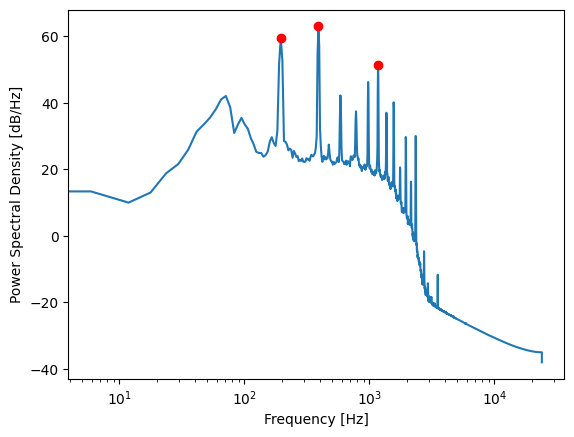

peaks: [ 195.65217391  391.30434783 1173.91304348]
max_peak: 391.304347826087


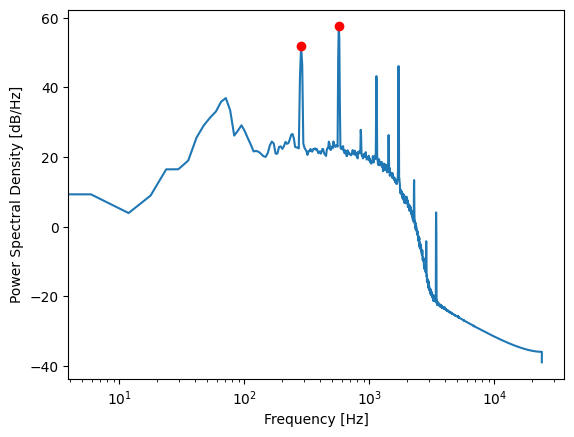

peaks: [284.58498024 569.16996047]
max_peak: 569.1699604743084


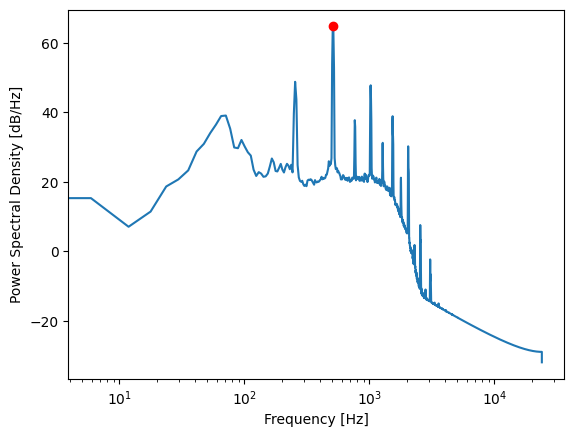

peaks: [509.88142292]
max_peak: 509.88142292490124


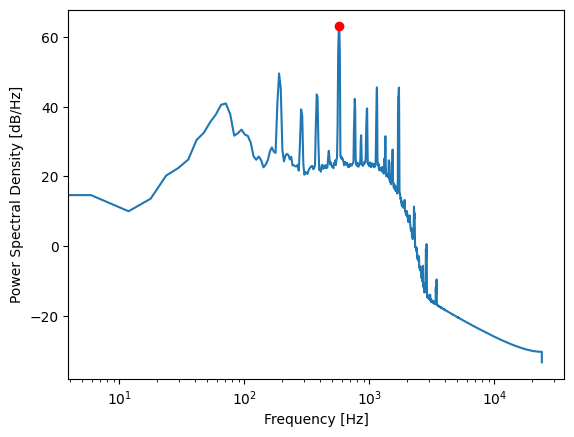

peaks: [575.09881423]
max_peak: 575.098814229249


575.098814229249

In [121]:
plot_power_spectral_density("sounds/l_motor_sound1.m4a")
plot_power_spectral_density("sounds/l_motor_sound2.m4a")
plot_power_spectral_density("sounds/l_motor_sound3.m4a")
plot_power_spectral_density("sounds/l_motor_sound8.m4a")

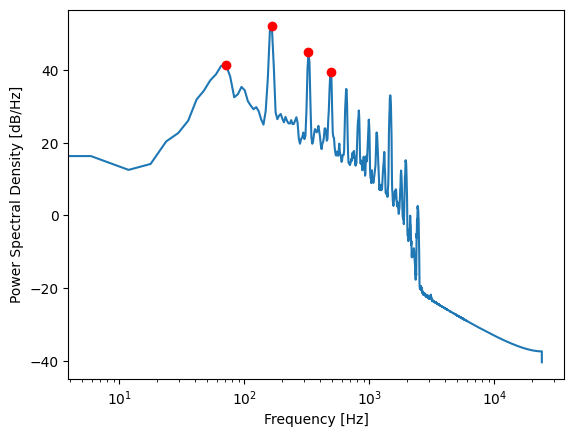

peaks: [ 71.14624506 166.00790514 326.08695652 492.09486166]
max_peak: 166.00790513833994


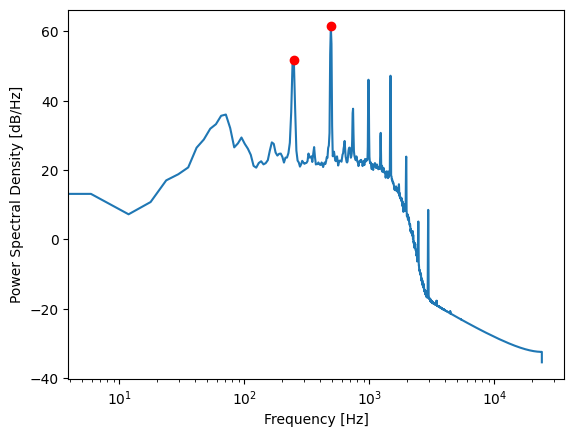

peaks: [249.01185771 492.09486166]
max_peak: 492.09486166007906


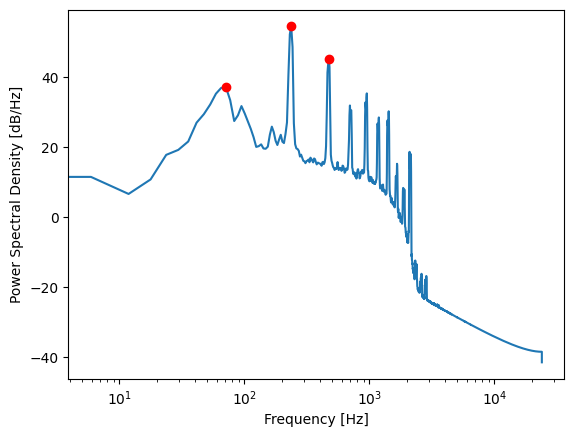

peaks: [ 71.14624506 237.1541502  474.3083004 ]
max_peak: 237.15415019762847


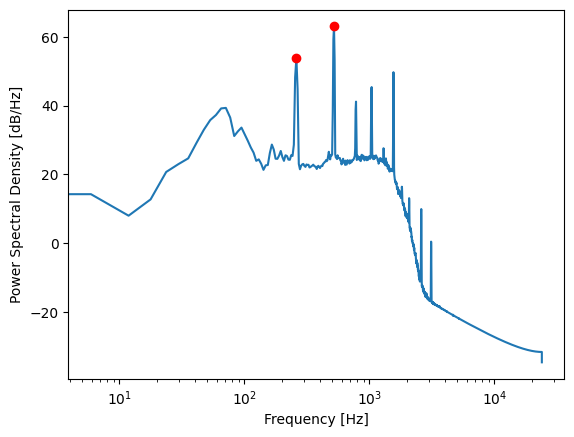

peaks: [260.86956522 521.73913043]
max_peak: 521.7391304347826


521.7391304347826

In [70]:
plot_power_spectral_density("sounds/r_motor_sound4.m4a",peak_height=7e3)
plot_power_spectral_density("sounds/r_motor_sound5.m4a")
plot_power_spectral_density("sounds/r_motor_sound6.m4a",peak_height=5e3)
plot_power_spectral_density("sounds/r_motor_sound7.m4a")

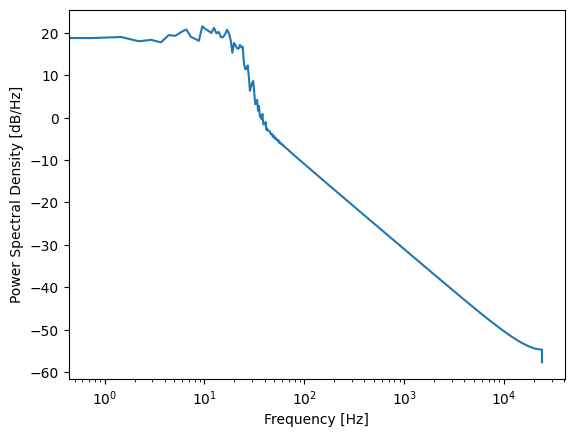

peaks: []
max_peak: 9.521484375


9.521484375

In [27]:
plot_power_spectral_density("sounds/l_motor_gear_sound1.m4a",cutoff_freq=20,nfft=1024*64)

In [50]:
# 通常モータの場合
# voltage_measured = np.array([1.902,3.14])
# current_measured = np.array([0.823,1.07])/5.1
# omega_measured = np.array([203,340])*2*np.pi

# ハイパーダッシュモータの場合
# R
# voltage_measured = np.array([1.023,3.158])
# current_measured = np.array([0.405,0.650])/1.2
# omega_measured = np.array([250,500])*2*np.pi

# # R ->
# voltage_measured = np.array([1.026,3.000])
# current_measured = np.array([0.4461,0.640])/1.2
# omega_measured = np.array([166.0,492.1])*2*np.pi

# R ->
# voltage_measured = np.array([1.372,3.090])
# current_measured = np.array([0.5426,0.681])/1.2
# omega_measured = np.array([237.2,521.7])*2*np.pi

# R -> R_M:2.238e-01,	 K_e:9.039e-04
# voltage_measured = np.array([1.026, 3.090])
# current_measured = np.array([0.4461, 0.681]) / 1.2
# omega_measured = np.array([166.0, 521.7]) * 2 * np.pi


# # L -> R_M:2.358e-01,	 K_e:8.949e-04
# voltage_measured = np.array([2.30,3.480])
# current_measured = np.array([0.508,0.650])/1.2
# omega_measured = np.array([391.3,596.2])*2*np.pi

# R_data(voltage,current,omega)
data_r = [
    [1.026, 0.4461, 166.0 * 2 * np.pi],  # data:4
    [3.000, 0.640, 492.1 * 2 * np.pi],  # data:5
    [1.372, 0.5426, 237.2 * 2 * np.pi],  # data:6
    [3.090, 0.681, 521.7 * 2 * np.pi],  # data:7
]

# L_data(voltage,current,omega)
data_l = [
    [2.300, 0.508, 391.3 * 2 * np.pi],  # data:1
    [3.480, 0.650, 569.2 * 2 * np.pi],  # data:2
    [3.163, 0.619, 509.9 * 2 * np.pi],  # data:3
    [3.460, 0.650, 575.1 * 2 * np.pi],  # data:8
]

data = data_r.copy()
data.extend(data_l)
#selected_idx = [0,3] # R用
#selected_idx = range(0,8) # R,L統合
selected_idx = [0, 1, 3, 4, 5]
# selected_idx = [4,5]  # L用
selected_data = np.array(data)[selected_idx, :]

# 最小二乗法でパラメータを推定
b = selected_data[:, 0, None]
coeff = selected_data[:, 1:]

x = np.linalg.solve(coeff.T @ coeff, coeff.T @ b)
R_M = x[0, 0]
K_e = x[1, 0]
print(f"R_M:{R_M:0.3e},\t K_e:{K_e:0.3e}")

R_M:2.139e-02,	 K_e:9.545e-04


In [23]:
# 抵抗が0.3Ωの場合,K_eを求める
R_M = 0.1
K_es = (b - R_M * coeff[:,0]) / (coeff[:,1])
print(f"K_e:{np.mean(K_es):0.3e}")

K_e:1.146e-03


In [26]:
# 抵抗はテスターで計測し、
# 逆起電力定数はTAMIYAモーターの説明書の中央値を使って計算する場合
R_M = 0.3
K_e = (2.7 - R_M * 2.3) /(320*2*np.pi)
print(f"R_M:{R_M:0.3e},\t K_e:{K_e:0.3e}")

R_M:3.000e-01,	 K_e:9.997e-04


### 駆動系の慣性モーメント・粘性抵抗の同定
駆動系の慣性モーメント$J_M$と粘性抵抗$D_\phi$の2つを同定する。

車輪を取り外し、駆動系のみとして場合に駆動系が従う方程式は、
$$
\begin{aligned}
J_M\ddot{\phi}_M &= \tau_M - \frac{\tau}{n} \\
\tau & = D_\phi \dot{\phi} \\
\tau_M &= K_T i = \frac{K}{R_M} (v -  K \dot{\phi}_M)\\
\end{aligned}
$$
である。$\phi_M = n \phi$に注意して、これらを１つの式にまとめると、
$$
\begin{aligned}
J_M\ddot{\phi}_M + \left(\frac{D_\phi}{n^2} + \frac{K^2}{R_M} \right)  \dot{\phi}_M &= \frac{K}{R_M} v \\
n^2J_M\ddot{\phi} + \left(D_\phi + \frac{n^2K^2}{R_M} \right)  \dot{\phi} &= \frac{nK}{R_M} v \\
\therefore n^2J_M\ddot{\phi} + H\dot{\phi} &= I v \\
\end{aligned}
$$
となる。以上より$I$は前述のモータのパラメータ同定により既知であるので、$J_M,H$を同定すれば良い。

パラメータの同定のために、入力$v$、出力$\omega:=\dot{\phi}$としたシステムのステップ応答を考える。
上記のシステムのラプラス変換は、
$$
\begin{aligned}
(n^2 J_M s + H)\Omega(s) = I V(s) \\
\therefore \Omega(s) = \frac{I}{n^2 J_M s + H} V(s) \\
\end{aligned}
$$
である。したがって$V(s) = V_0/s$のステップ応答は、
$$
\begin{aligned}
\Omega(s) &= \frac{I}{n^2 J_M s + H} \frac{V_0}{s} \\
&= \frac{I V_0}{s(n^2 J_M s + H)}
\end{aligned}
$$
となる。初期値定理より、
$$
\begin{aligned}
\dot{\omega}(0) &= \lim_{s \to \infty} s^2\Omega(s) \\
&= \lim_{s \to \infty} \frac{sI V_0}{n^2 J_M s + H} \\
&= \frac{I V_0}{n^2 J_M}
\end{aligned}
$$
となり、最終値定理より、
$$
\begin{aligned}
\omega( \infty) &= \lim_{s \to 0} s\Omega(s) \\
&= \lim_{s \to 0} \frac{I V_0}{n^2 J_M s + H} \\
&= \frac{I V_0}{H}
\end{aligned}
$$
となる。以上の２式より、
$$
\begin{aligned}
   J_M &= \frac{I V_0}{n^2 \dot{\omega}(0)} \\
   H &= \frac{I V_0}{\omega(\infty)}
\end{aligned}
$$
と求められる。

###  計測結果
計測の結果、ステップ応答の最終値は、

|電圧$V_0$[V]|回転速度[rev/s]|角速度$\omega(\infty)$[rad/s]
|:---:|:---:|:---:|
|2.38|50/17.37|18.086|
|2.15|100/33.73|18.628|

であった。前述の結果より、$R_M:2.139\times 10^{-2},	 K_e:9.545\times 10^{-4}$なので、
$$
\begin{aligned}
I &= \frac{nK}{R_M} = 5.120
\end{aligned}
$$
である。

In [51]:
I = n * K_e / R_M
print(f"I:{I:0.3e}")

I:5.120e+00


$I$を用いて上記の個々の計測結果を元に$H = I V_0/\omega(\infty)$を求め、
それらの平均を求めると、
$$H= 0.632$$
となる。

In [53]:
data = [
   [2.38, 50/17.37],
   [2.15, 100/33.73]]

data = np.array(data)
voltage_data = data[:,0]
omega_data = data[:,1]*2*np.pi
H_data = I * voltage_data / omega_data
H = np.mean(H_data)
print(f"H_data:",H_data)
print(f"H:{H:0.3e}")

H_data: [0.67375646 0.59095032]
H:6.324e-01


次に、慣性モーメント$J_M$を求める。$J_M$は計測が面倒なので、各ギアの慣性モーメントと減速比から計算する。

１つのギアの質量$m_g=0.6$ g、半径$r_g=9$ mmであった。そのため、ギアを密度一定の円盤として近似するとギア１つの慣性モーメント$J_1$は、
$$
\begin{aligned}
J_1 &= \frac{1}{2} m_g r_g^2 \\
&=2.43 \times 10^{-8}\;\text{kgm}^2
\end{aligned}
$$
となる。

In [62]:
r_g = 0.009 #m
m_g = 0.0006 #kg 
J_1 = m_g * r_g**2/2
print(f"J_1:{J_1:0.3e}")

J_1:2.430e-08


モーターから車輪まではギアが4つ使用されており、各ギアのモータ側からのギア比はそれぞれ、
+ $8/34$
+ $8/34 \times 12/36$
+ $8/34 \times 12/36 \times 12/36$
+ $8/34 \times 12/36 \times 12/36 \times 12/36$

である。よって、モータ側から見た慣性モーメント$J_M$は、
$$
\begin{aligned}
J_M &= J_1 \times \left(\frac{8}{34}\right)^2 + J_1 \times \left(\frac{8}{34}\frac{12}{36}\right)^2 + J_1 \times \left(\frac{8}{34}\frac{12}{36}\frac{12}{36}\right)^2 + J_1 \times \left(\frac{8}{34}\frac{12}{36}\frac{12}{36}\frac{12}{36}\right)^2 \\
&= J_1 \left(\frac{4}{17}\right)^2 \left(1 + \frac{1}{9} + \frac{1}{9^2} + \frac{1}{9^3}\right) \\
&= 1.513 \times 10^{-9}\;\text{kgm}^2
\end{aligned}
$$
となる。

In [61]:
J_M = J_1 *((8/34)**2 + (8/34 * 12/36)**2 + (8/34 * 12/36 * 12/36)**2 + (8/34 * 12/36 * 12/36 * 12/36)**2)
print(f"J_M:{J_M:0.3e}")

J_M:1.513e-09


0.037037037037037035

よって、
$$
\begin{aligned}
n^2 J_M &= J_1 (1 + 9 + 9^2 + 9^3) \\
&= 820 J_1 \\ 
&= 1.993 \times 10^{-5} \;\text{kgm}^2
\end{aligned}
$$
となる。

In [65]:
assert(np.abs(n**2 * J_M - 820 *J_1) < 1e-8)
n2J_M = n**2 * J_M
print(f"n2J_M:{n2J_M:0.3e}")

n2J_M:1.993e-05


# 雑記


## センサバイアスの除去
センサにバイアスがあって$\bm{y} = C \bm{x} + \bm{d}$となる場合にも、外乱オブザーバの考え方を利用することで、バイアスを除去できる場合がある。


### 理論
今回の問題に照らした例として、角速度センサに定数バイアス$\omega_b$がある場合を考える。
このときの出力方程式は、$\dot{\theta}$を$\dot{\theta} + \omega_b$に置き換えたものになる。
つまり、出力方程式は、
$$
\begin{aligned}
\bm{y} &= C\begin{bmatrix}\theta \\ \phi \\ \dot{\theta}+ \omega_b  \\ \dot{\phi} \end{bmatrix} \\
\end{aligned}
$$
となる。上の式は状態量$\bm{x}$に対して線形ではない。そこで、新たな状態量として、
$$
\begin{aligned}
\bm{x}_b &:= \bm{x} +  \begin{bmatrix}0 \\ 0 \\ \omega_b \\ 0 \end{bmatrix} 
= \begin{bmatrix} \theta \\ \phi \\ \dot{\theta} + \omega_b \\ \dot{\phi} \end{bmatrix} \\
\end{aligned}
$$
を定義する。これにより出力方程式が新たな状態量$\bm{x}_b$に対して線形になる。
状態量$\bm{x}_b$の状態方程式を導出するために、
$$
\bm{x} = \bm{x}_b -  \begin{bmatrix}0 \\ 0 \\ \omega_b \\ 0 \end{bmatrix} \\
$$
であること、$\dot{\omega}_b=0$なので、
$$
\dot{\bm{x}} = \dot{\bm{x}}_b
$$
であることを利用し、これらを元の状態空間表現に代入すると、
$$
\begin{aligned}
\dot{\bm{x}}_b &= A \left( \bm{x}_b -  \begin{bmatrix}0 \\ 0 \\ \omega_b \\ 0 \end{bmatrix} \right) -B\bm{u} \\
&= A \bm{x}_b -  \bm{a}_3 \omega_b - B \bm{u}\\
\bm{y} &= C \bm{x}_b\\
\end{aligned}
$$
となる。上は状態に関して線形ではない。そこで、さらに状態$\hat{\bm{x}}$を以下で定義した拡大系を考える。
$$
\hat{\bm{x}} := \begin{bmatrix} \bm{x}_b \\ \omega_b \end{bmatrix}
$$
すると、上の状態空間表現は、
$$
\begin{aligned}
\dot{\hat{\bm{x}}} &= \begin{bmatrix} A & -\bm{a}_3 \\ 0 & 0 \end{bmatrix} \hat{\bm{x}} + \begin{bmatrix} B \\ 0 \end{bmatrix} \bm{u} \\
\bm{y} &= \begin{bmatrix} C & 0 \end{bmatrix} \hat{\bm{x}} \\
\end{aligned}
$$
となり、状態に関して線形な状態空間表現に変形できた。

以上の拡大系に対してオブザーバを設計することで、バイアス$\omega_b$を推定できる。
そして、推定したバイアスを利用して元の状態を推定することで、バイアスを除去した状態推定・状態フィードバックが行える。
補足として、オブザーバを構成するためには拡大系が可観測である必要があるが、実際に数値計算すると可観測であることが確かめられるので、問題ない。



In [ ]:
# dthetaにバイアスw_dがあるとして拡大系を構成したときに系が可観測か確認
A_extend = np.hstack([A, -A[:,None,2]])
A_extend = np.vstack([A_extend, np.array([0,0,0,0,0])])
C_extend = np.hstack([C, np.zeros((2,1))])

U_o_extend = np.vstack([C_extend, C_extend @ A_extend, C_extend @ A_extend @ A_extend, C_extend @ A_extend @ A_extend @ A_extend, C_extend @ A_extend @ A_extend @ A_extend @ A_extend])
print("rank U_o_extend:", np.linalg.matrix_rank(U_o_extend))

# 車輪の回転角度を状態空間表現から除いた場合
A_wo_phi_ext = np.hstack([A_wo_phi, -A_wo_phi[:,None,1]])
A_wo_phi_ext = np.vstack([A_wo_phi_ext, np.array([0,0,0,0])])
C_wo_phi_ext = np.hstack([C_wo_phi[1,None,:], np.zeros((1,1))])

U_o_wo_phi_ext = np.vstack([C_wo_phi_ext, C_wo_phi_ext @ A_wo_phi_ext, C_wo_phi_ext @ A_wo_phi_ext @ A_wo_phi_ext, C_wo_phi_ext @ A_wo_phi_ext @ A_wo_phi_ext @ A_wo_phi_ext])
print("rank U_o_wo_phi_ext:", np.linalg.matrix_rank(U_o_wo_phi_ext))

# print("rank(A):", np.linalg.matrix_rank(A))
# print("rank(A_wo_phi):", np.linalg.matrix_rank(A_wo_phi))

また、上記のバイアスに加えて、角度$\theta$が定数バイアス$\theta_d$が加わった状態で観測できる場合にも、上記と同様の手順により拡大系・オブザーバを構成できる。

In [ ]:
# theta・dthetaにバイアスtheta_d, w_dがあるとして拡大系を構成したときに系が可観測か確認
A_ex = np.hstack([A,-A[:,None,0], -A[:,None,2]])
A_ex = np.vstack([A_ex, np.zeros((2,6))])
C_ex = np.vstack([np.array([[1,0,0,0]]),C])#thetaも観測できる
C_ex= np.hstack([C_ex, np.zeros((3,2))])

U_o_ex = np.vstack([C_ex, C_ex @ A_ex, C_ex @ A_ex @ A_ex, C_ex @ A_ex @ A_ex @ A_ex,C_ex @ A_ex @ A_ex @ A_ex @ A_ex,C_ex @ A_ex @ A_ex @ A_ex @ A_ex @ A_ex])
print("rank U_o_ex:", np.linalg.matrix_rank(U_o_ex))


### シミュレーション
上記の２つのバイアスを除去するシミュレーションを行う。

#### バイアスを除去しない場合

In [ ]:
# 観測誤差として角度5度のバイアスがあるとする
theta_b = np.radians(5)

# 20秒間動かすシミュレーションを実行
t_end = 20
dt = 0.01
t_points = np.arange(0, t_end, dt)

#初期条件の設定：15度傾け、位置を1mずらした状態から開始
theta_init = np.radians(15)
x_est_init = 0.5
phi_init = x_est_init / r - theta_init


#常微分方程式を解く

# # scipyの関数を使う場合
# dynamics_func = lambda t, x: pendulum_simulator.dynamics_nonlinear(t, x,voltage_control,force_disturbance) 
# x_est_init = np.array([theta_init, phi_init, 0, 0])
# sol = solve_ivp(dynamics_func, [0, t_end], x_est_init, t_eval=t_points)
# # 解いた結果を取り出す
# theta_hist = sol.y[0].T
# phi_hist = sol.y[1].T
# dtheta_hist = sol.y[2].T
# dphi_hist = sol.y[3].T

#自分でルンゲクッタ法を実装する場合
pendulum_simulator.reset(theta_init, phi_init,0, 0)
x_hist = []
v=0
f_d = 0
for t in t_points:
    x = pendulum_simulator.step(v, f_d, dt)
    # 観測バイアスを加える
    x[0] += theta_b 
    v = voltage_control(t, x)
    f_d = force_disturbance(t, x)
    x_hist.append(x) 

x_hist = np.array(x_hist)

# 解いた結果を取り出す
theta_hist = x_hist[:, 0]
phi_hist = x_hist[:, 1]
dtheta_hist = x_hist[:, 2]
dphi_hist = x_hist[:, 3]

voltage_hist = np.zeros_like(t_points)
f_d_hist  = np.zeros_like(t_points)
for i,t in enumerate(t_points):
    # voltage_hist[i] = voltage_control(t, sol.y[:,i])
    # f_d_hist[i] =force_disturbance(t, sol.y[:,i])
    voltage_hist[i] = voltage_control(t, x_hist[i,:])
    f_d_hist[i] =force_disturbance(t, x_hist[i,:])

x_hist = r * (theta_hist + phi_hist)
v_hist = r * (dtheta_hist + dphi_hist)


# モータにエネルギー損失がある場合のモデル同定
モータのエネルギー損失を考慮して$K_T\ne K_e$ と考え、両者を別々に同定することを考える。
### 駆動系の慣性モーメント・粘性抵抗の同定
駆動系の慣性モーメント$J_M$と粘性抵抗$D_\phi$の2つを同定する。
車輪を取り外し、駆動系のみとして場合に駆動系が従う方程式は、
$$
\begin{aligned}
J_M\ddot{\phi}_M &= \tau_M - \frac{\tau}{n} \\
\tau & = D_\phi \dot{\phi} \\
\tau_M &= K_T i = \frac{K_T}{R_M} (v -  K_e \dot{\phi}_M)\\
\end{aligned}
$$
である。$\phi_M = n \phi$に注意して、これらを１つの式にまとめると、
$$
\begin{aligned}
J_M\ddot{\phi}_M + \left(\frac{D_\phi}{n^2} + \frac{K_T K_e}{R_M} \right)  \dot{\phi}_M &= \frac{K_T}{R_M} v \\
n^2J_M\ddot{\phi} + \left(D_\phi + \frac{n^2K_T K_e}{R_M} \right)  \dot{\phi} &= \frac{nK_T}{R_M} v \\
\therefore n^2J_M\ddot{\phi} + H\dot{\phi} &= I v \\
\end{aligned}
$$
となる。つまり、$J_M,H,I$を同定すれば良いことがわかる。
ここで、上の微分方程式は、同定したい係数を定数倍しても成り立つので、上の方程式だけでは定数倍の任意性が残ることがわかる。
これをなくすためには、駆動系の出力に既知の慣性モーメント$J_T$を持つ物体をつけたダイナミクスを考えれば良い。このような状況設定において、駆動系のダイナミクスは
$$
\begin{aligned}
(n^2J_M + J_T)\ddot{\phi} + H\dot{\phi} &= I v \\
\end{aligned}
$$
となる。
TODO:追記